In [3]:
#pip install jupyterthemes

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

import time

In [5]:
credit_df = pd.read_csv('marketing_data.csv')

In [6]:
credit_df.columns.tolist()

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [7]:
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
print('Min Balance ',credit_df['BALANCE'].min())
print('Max Balance ',credit_df['BALANCE'].max())
print('Average Balance', credit_df['BALANCE'].mean())

Min Balance  0.0
Max Balance  19043.13856
Average Balance 1564.4748276781038


In [10]:
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Find max on off purchase customer

In [11]:
credit_df.loc[credit_df['ONEOFF_PURCHASES'] == credit_df['ONEOFF_PURCHASES'].max()]['CUST_ID']

550    C10574
Name: CUST_ID, dtype: object

### Find cash in advance max customer

In [12]:
credit_df.loc[credit_df['CASH_ADVANCE'] == credit_df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [13]:
credit_df.loc[credit_df['CASH_ADVANCE'] == credit_df['CASH_ADVANCE'].max()]['CUST_ID']

2159    C12226
Name: CUST_ID, dtype: object

In [14]:
credit_df.loc[credit_df['CASH_ADVANCE'] == credit_df['CASH_ADVANCE'].max()]['CASH_ADVANCE_TRX']

2159    123
Name: CASH_ADVANCE_TRX, dtype: int64

In [15]:
credit_df.loc[credit_df['CASH_ADVANCE'] == credit_df['CASH_ADVANCE'].max()]['CASH_ADVANCE_FREQUENCY']

2159    1.0
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

## visualize the data

<AxesSubplot:>

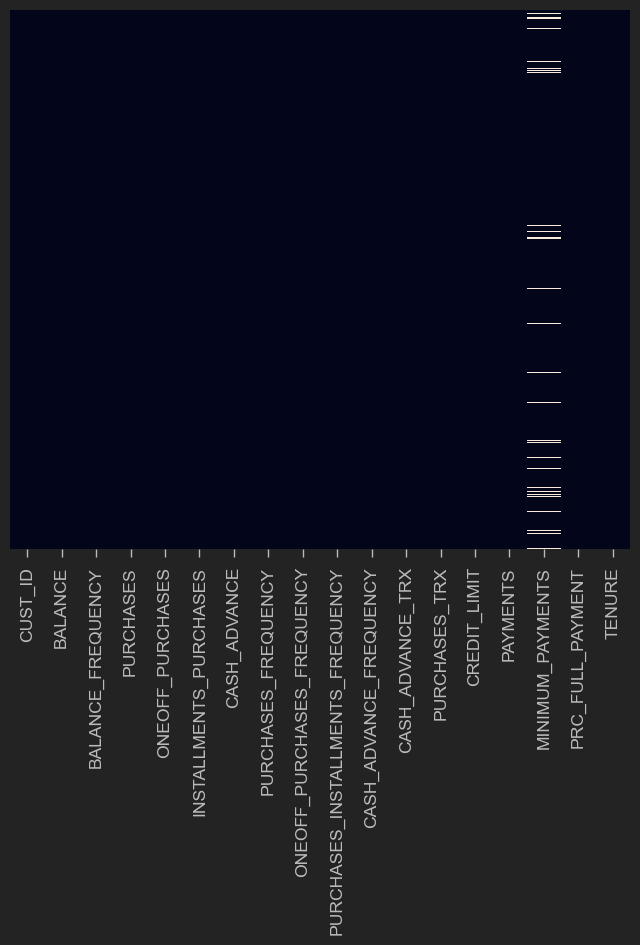

In [16]:
sns.heatmap(credit_df.isnull(), yticklabels=False, cbar = False)

### Check the null values

In [17]:
credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [18]:
credit_df.loc[(credit_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = credit_df['MINIMUM_PAYMENTS'].mean()

In [19]:
credit_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Replace the null value with minimum credit limit value

In [20]:
credit_df.loc[(credit_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = credit_df['CREDIT_LIMIT'].min()

In [21]:
credit_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Check the values again

<AxesSubplot:>

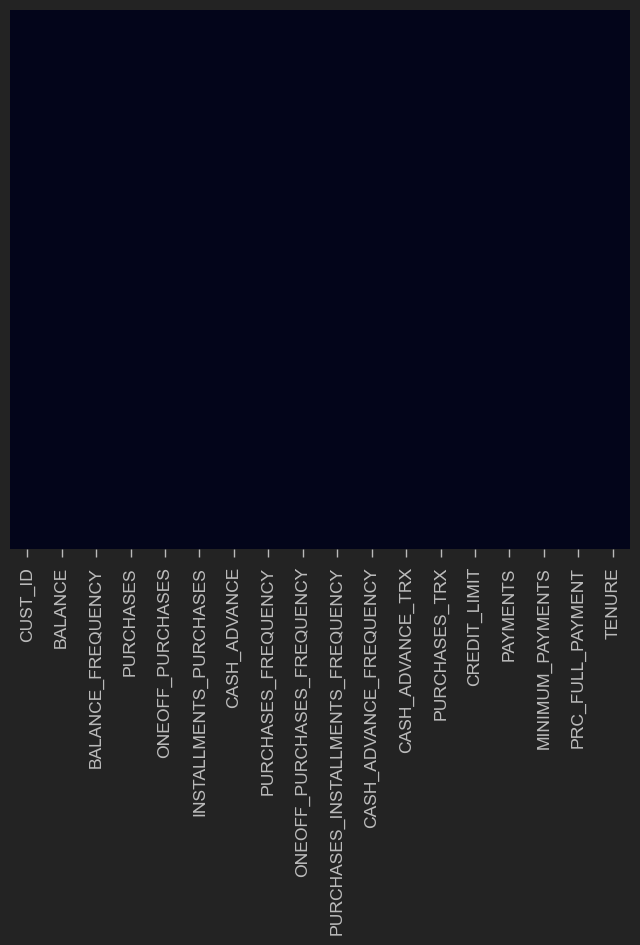

In [22]:
sns.heatmap(credit_df.isnull(), yticklabels=False, cbar = False)

In [23]:
credit_df.duplicated().sum()

0

In [24]:
credit_df.drop('CUST_ID', axis = 1, inplace = True)

In [25]:
credit_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


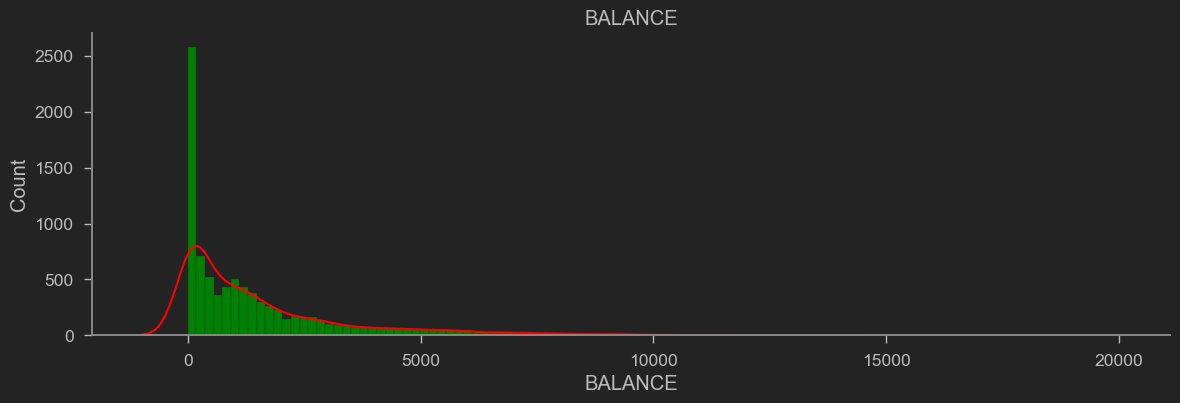

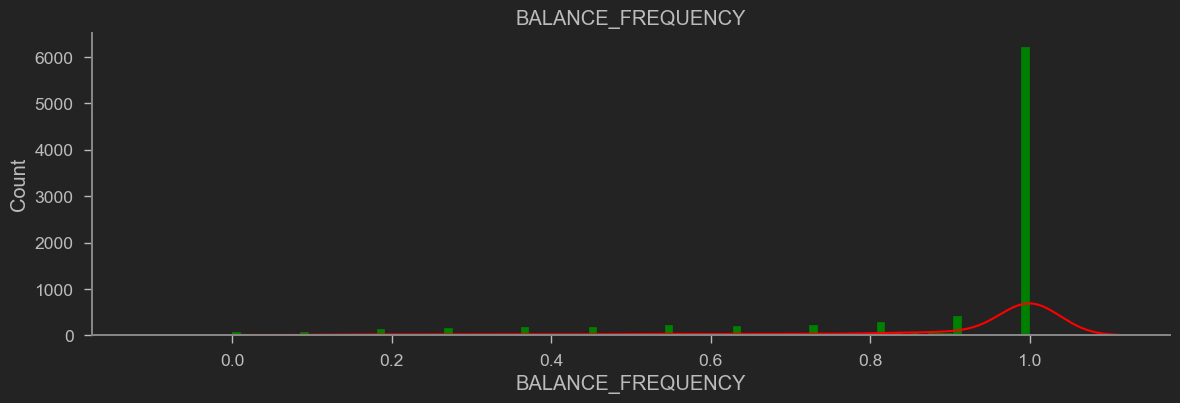

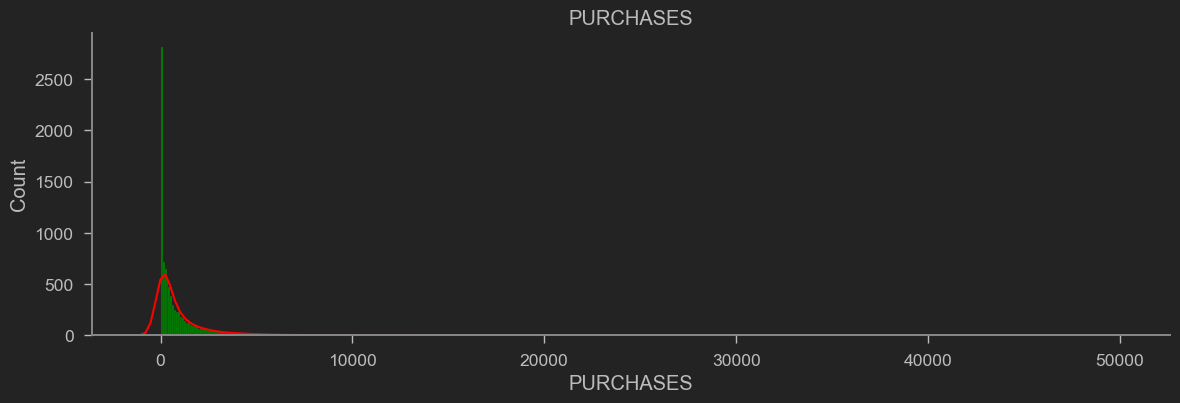

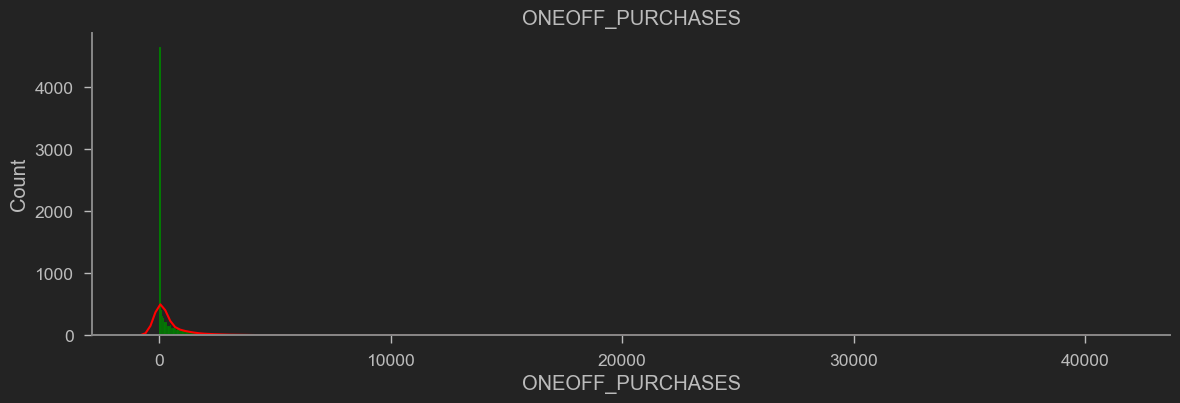

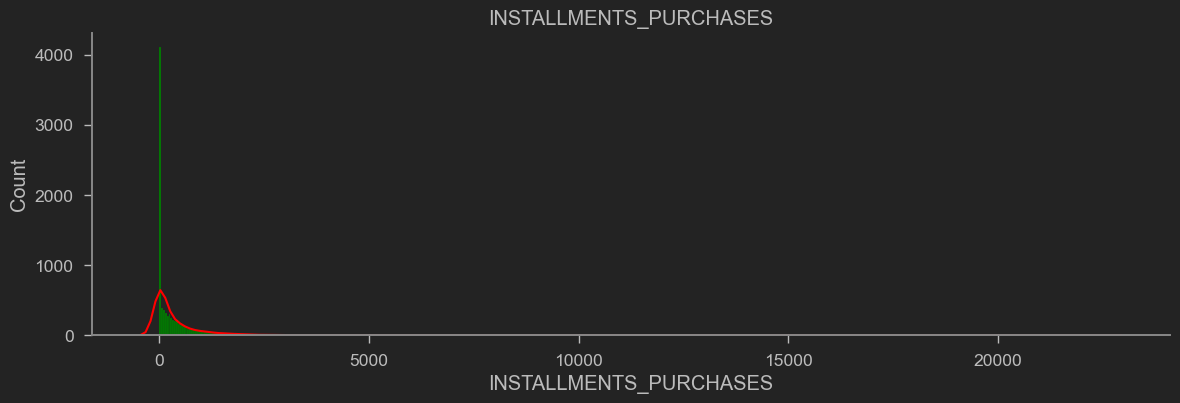

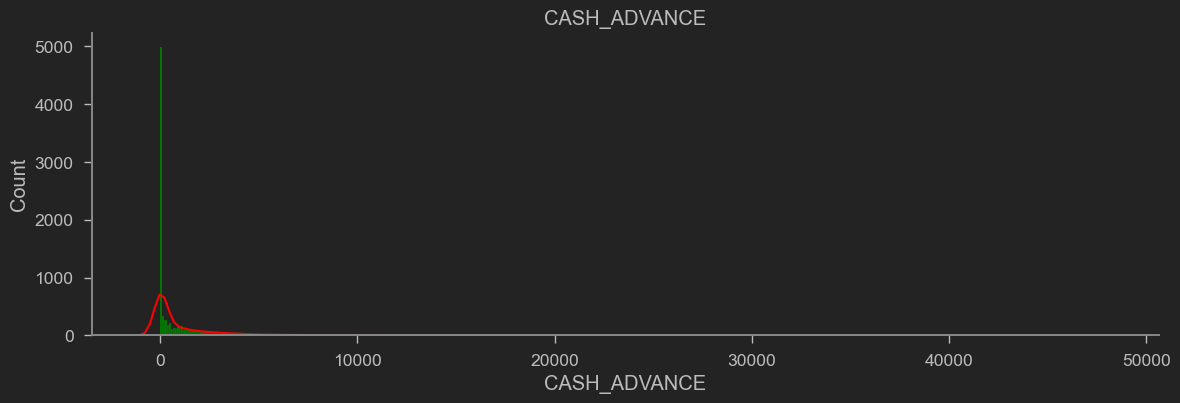

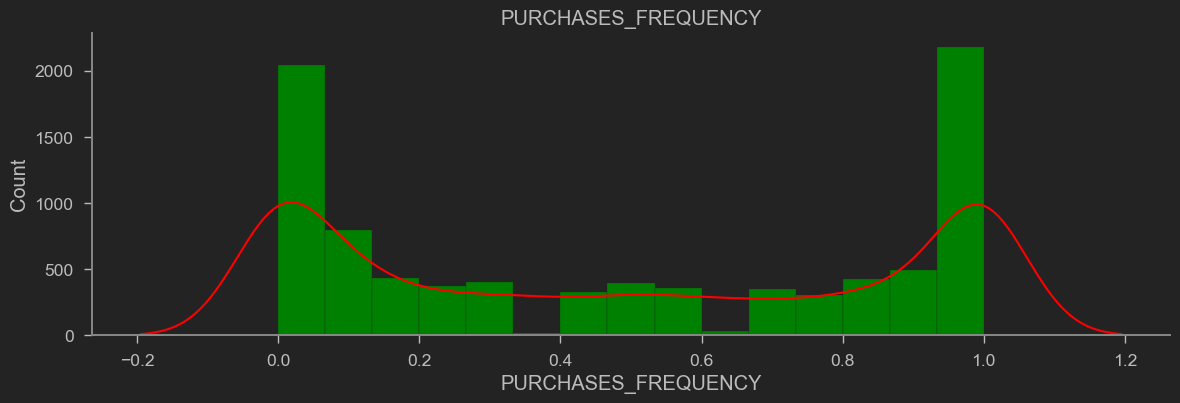

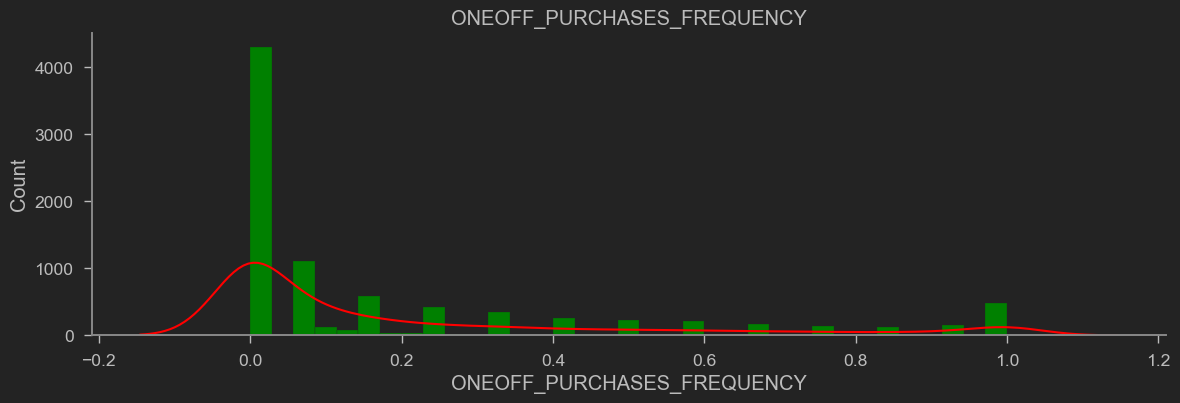

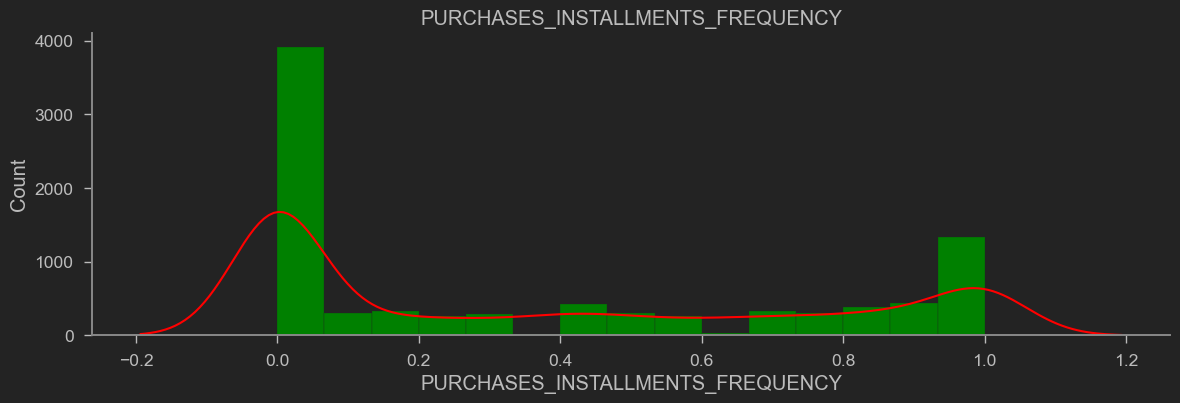

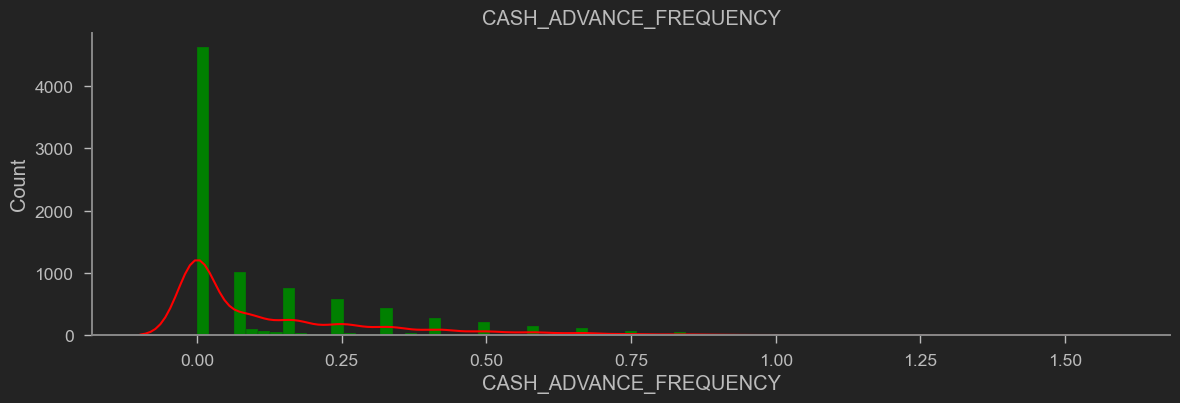

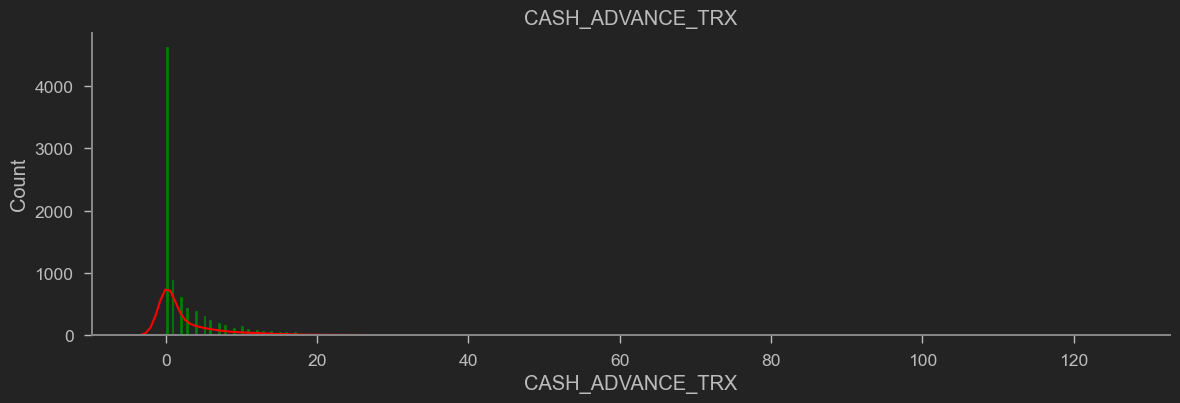

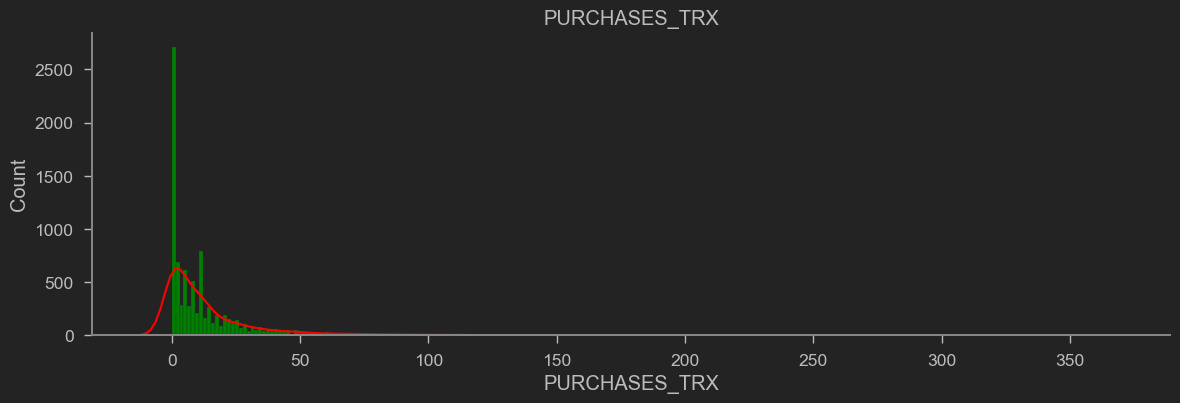

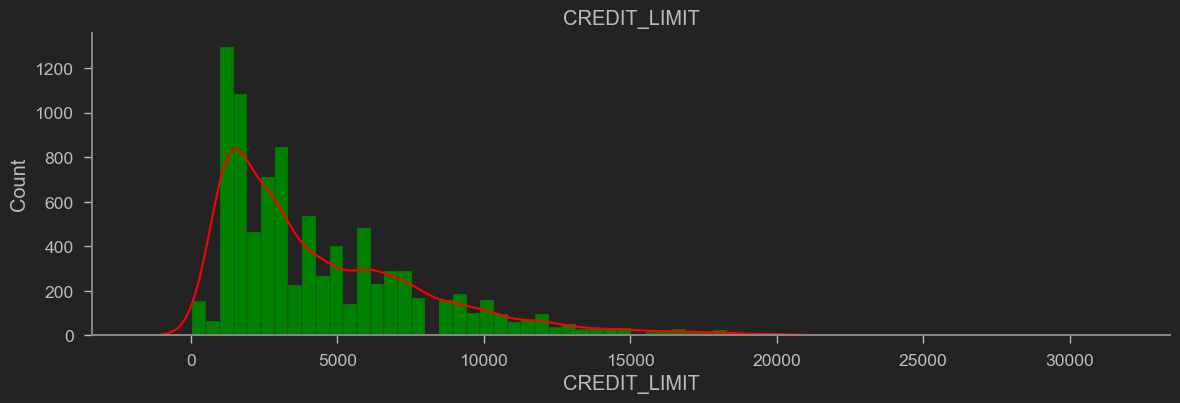

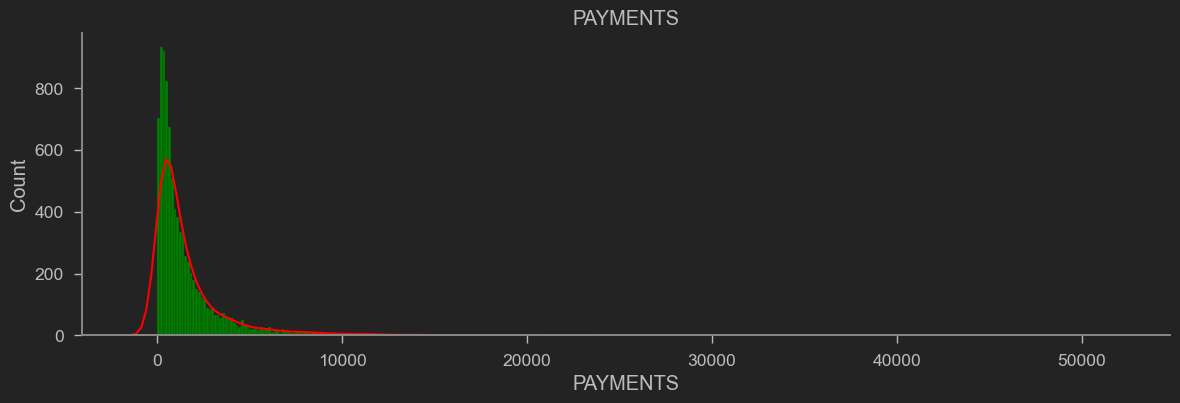

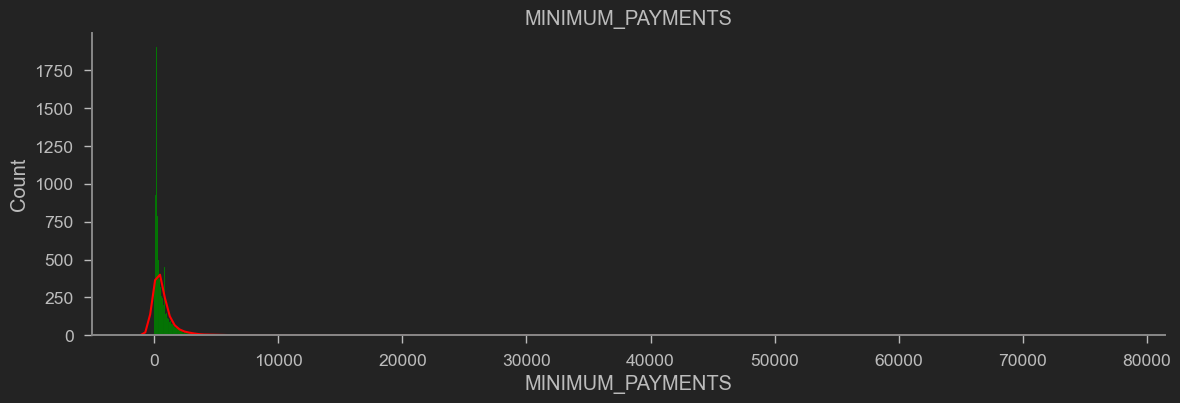

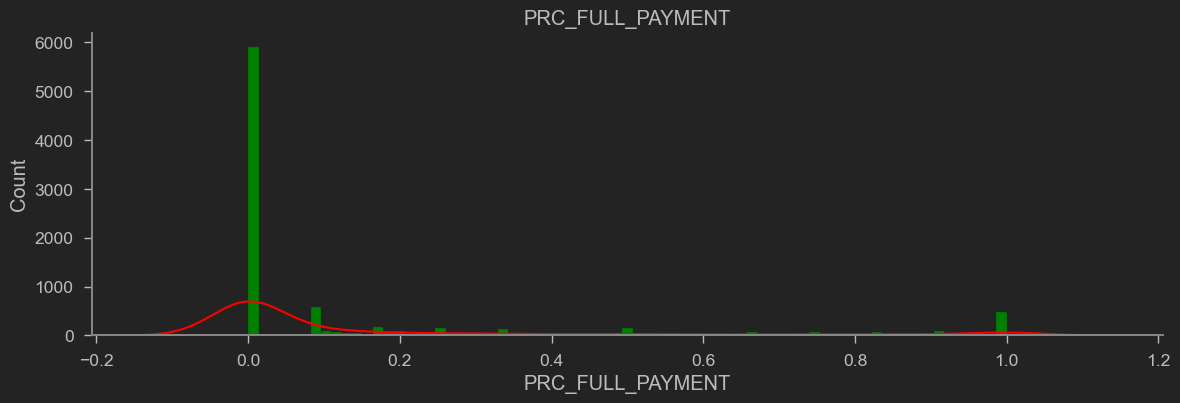

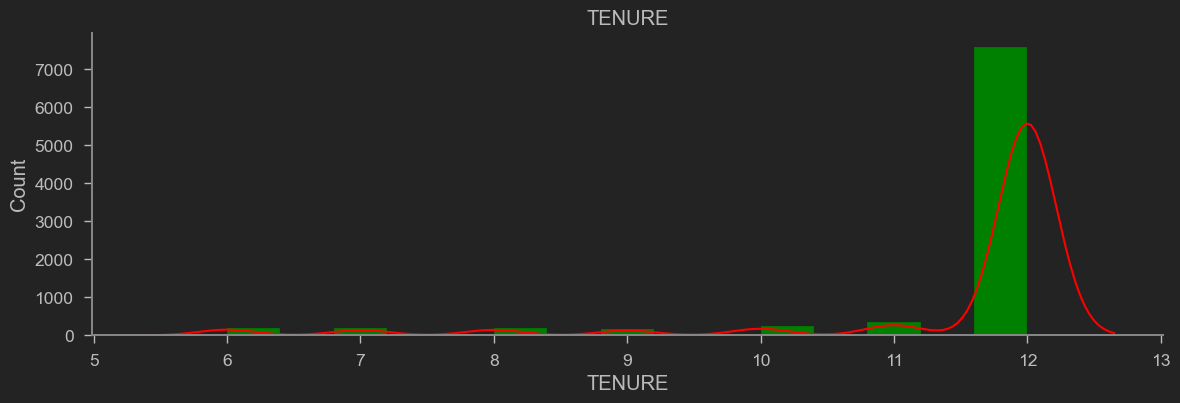

<Figure size 800x700 with 0 Axes>

In [26]:

for i in range(len(credit_df.columns)):
    #plt.figure(figsize = (10,50))
    #plt.subplot(17,1,i+1)
    #sns.displot(credit_df[credit_df.columns[i]], kde_kws = {'color' : 'b', 'lw':3, 'label':'KDE'}, hist_kws= {'color':'g'})
    sns.displot(credit_df[credit_df.columns[i]], kde = True, color = 'red', label = 'KDE', facecolor = 'green', height = 4, aspect= 3, legend = True, kde_kws = {'cut': 3})
    plt.title(credit_df.columns[i])
    plt.show()
    
plt.tight_layout()

<AxesSubplot:>

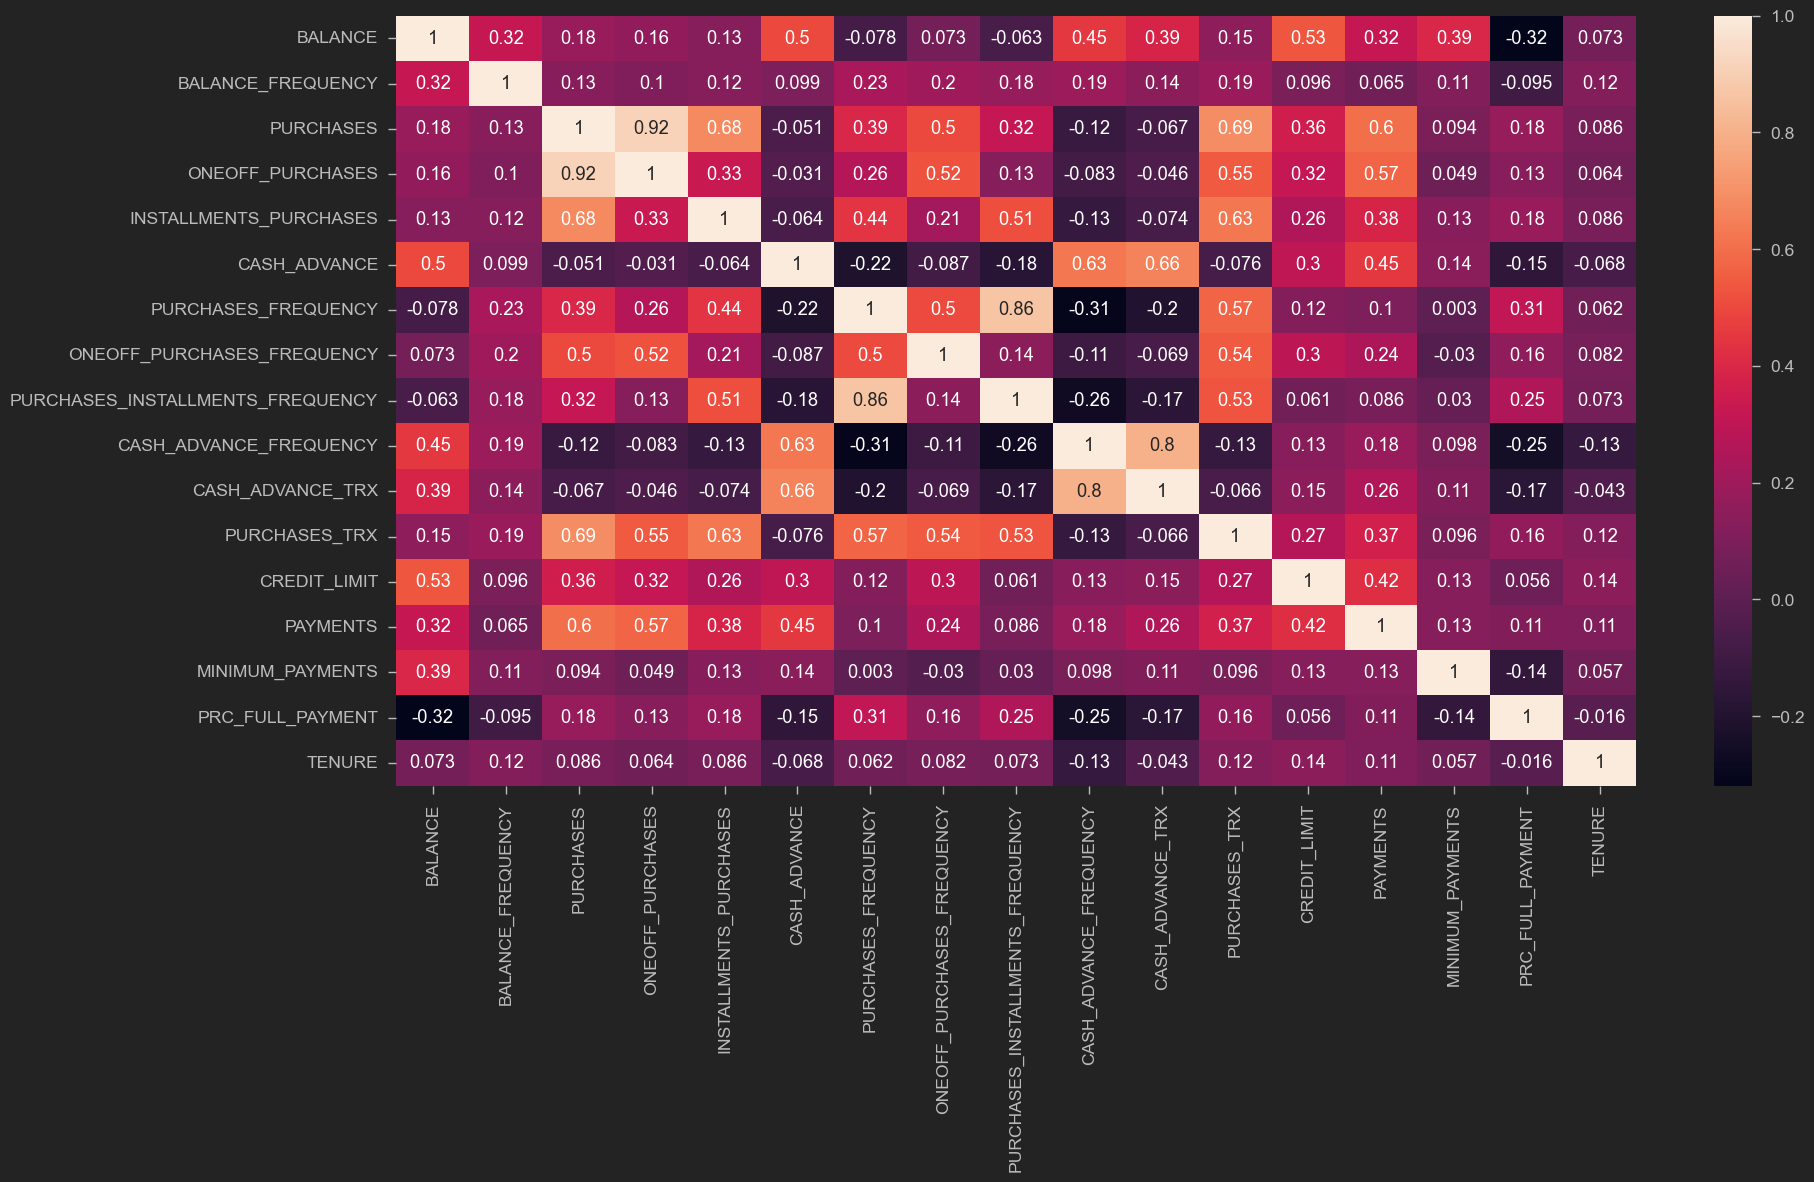

In [27]:
f, ax = plt.subplots(figsize = (20,10))
sns.heatmap(credit_df.corr(), annot=True)

# K-Means Clustering

In [28]:
scaler = StandardScaler()

In [29]:
credit_df_scaled = scaler.fit_transform(credit_df)

In [30]:
credit_df.shape

(8950, 17)

In [31]:
credit_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [32]:
score_1 = []
time_score_1 = []
range_value = range(1,20)
for i in range_value:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(credit_df_scaled)
    score_1.append(kmeans.inertia_)
    time_score_1.append(time.time())

### Elbow graph

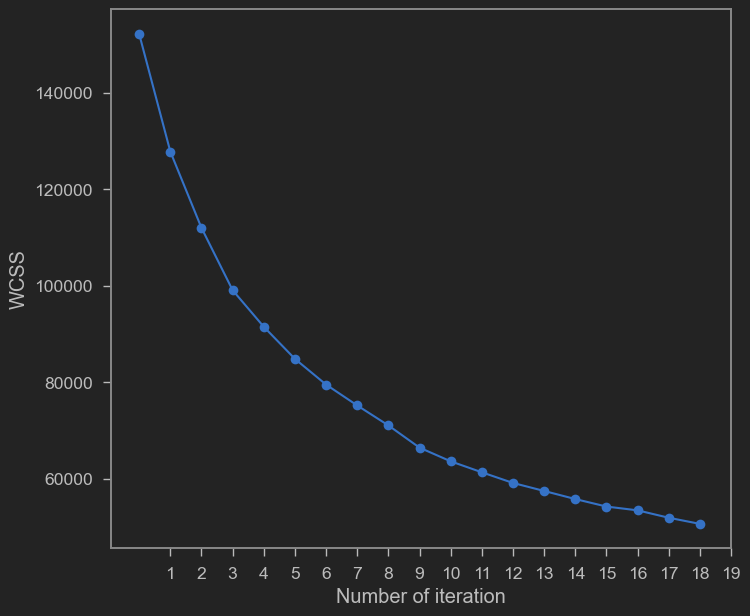

In [33]:
plt.plot(score_1, '-o')
plt.xlabel('Number of iteration')
plt.ylabel('WCSS')
plt.xticks(range(1,20))
plt.show()
           



In [34]:
credit_df_scaled[:,:7].shape

(8950, 7)

In [35]:
## for only first 7 columns
score_2 = []
range_value = range(1,20)
for i in range_value:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(credit_df_scaled[:,:7])
    score_2.append(kmeans.inertia_)

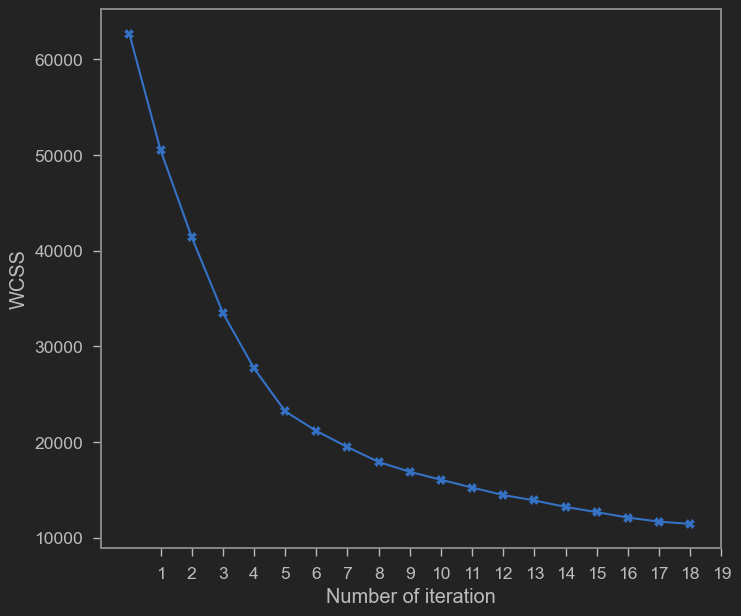

In [36]:
plt.plot(score_2, '-X')
plt.xlabel('Number of iteration')
plt.ylabel('WCSS')
plt.xticks(range(1,20))
plt.show()

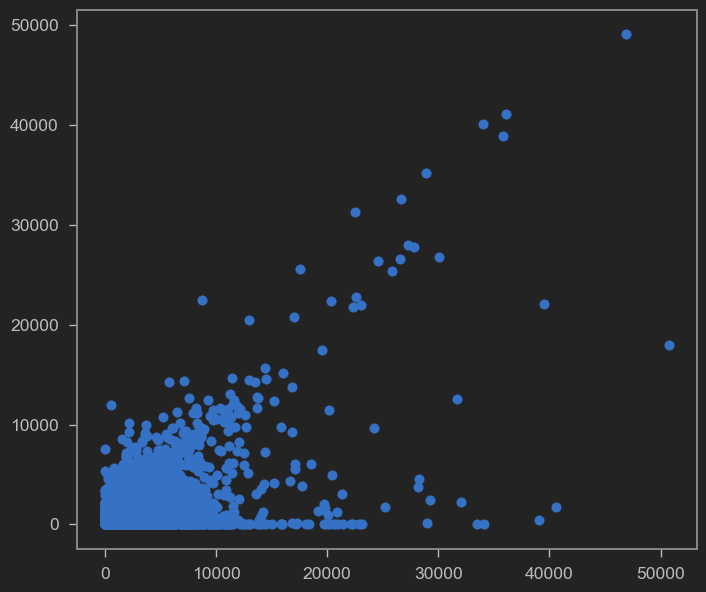

In [37]:
plt.scatter(credit_df['PAYMENTS'], credit_df['PURCHASES'])

In [38]:
kmeans = KMeans(7)

kmeans.fit(credit_df_scaled)

KMeans(n_clusters=7)

In [39]:
kmeans.labels_

array([1, 2, 4, ..., 0, 0, 0])

In [40]:
kmeans.cluster_centers_.shape

(7, 17)

In [41]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[credit_df.columns])

In [42]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.337794,-0.349455,-0.284231,-0.208737,-0.288211,0.065446,-0.197106,-0.271926,-0.229662,0.302135,-0.002861,-0.385258,-0.559330,-0.390736,-0.209560,0.013756,-3.195855
1,0.016876,0.402551,-0.345887,-0.226614,-0.401406,-0.091801,-0.819412,-0.339867,-0.759882,0.103363,-0.027857,-0.467650,-0.296080,-0.242791,-0.012811,-0.452381,0.271084
2,1.699347,0.395276,-0.195150,-0.143964,-0.197030,2.022117,-0.438626,-0.178820,-0.388563,1.923059,1.950626,-0.227075,1.031694,0.854170,0.564892,-0.391251,0.066598
3,-0.370199,0.332744,-0.042536,-0.232042,0.325553,-0.369216,0.971844,-0.349755,1.161281,-0.478527,-0.363563,0.166449,-0.277798,-0.225290,-0.030858,0.297697,0.252588
4,0.134164,0.430102,0.948485,0.900540,0.588213,-0.306586,1.094382,1.868521,0.538619,-0.408634,-0.318217,1.210117,0.708193,0.396501,-0.033601,0.459152,0.307684
5,1.443847,0.414656,7.093187,6.244031,5.297641,0.004274,1.081960,1.867817,1.035380,-0.299540,-0.116878,4.699112,2.171419,4.847281,1.104788,0.830765,0.333341
6,-0.701966,-2.129702,-0.306937,-0.230466,-0.302228,-0.323561,-0.546545,-0.427057,-0.441465,-0.522763,-0.377149,-0.416244,-0.172776,-0.202648,-0.257786,0.295386,0.200063


In [43]:
cluster_centers = scaler.inverse_transform(cluster_centers)

In [44]:
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[credit_df.columns])

In [45]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,861.385360,0.794488,395.941226,245.976624,150.442309,1116.114939,0.411243,0.121337,0.273164,0.195605,3.229299,5.133758,2458.710191,602.000784,375.834865,0.157738,7.240446
1,1599.601724,0.972631,264.211934,216.304817,48.081125,786.359695,0.161481,0.101069,0.062441,0.155828,3.058720,3.085795,3416.602203,1030.286656,834.352011,0.021401,11.880098
2,5101.522986,0.970908,586.264442,353.485869,232.895570,5219.344527,0.314309,0.149112,0.210012,0.519968,16.560414,9.065593,8247.991422,4205.883644,2180.663655,0.039280,11.606444
3,793.935843,0.956095,912.325099,207.295922,705.461340,204.607904,0.880398,0.098119,0.825960,0.039386,0.767779,18.847121,3483.125400,1080.949957,792.292978,0.240786,11.855346
4,1843.725300,0.979158,3029.658660,2087.149819,942.981655,335.946696,0.929579,0.759874,0.578498,0.053372,1.077226,44.788810,7070.864675,2880.974764,785.901585,0.288009,11.929078
5,4569.720859,0.975499,16157.907683,10956.249146,5201.658537,987.833746,0.924593,0.759664,0.775924,0.075203,2.451220,131.512195,12395.121951,15765.548522,3438.869446,0.396699,11.963415
6,103.391285,0.372764,347.429370,209.911679,137.766893,300.348988,0.270996,0.075058,0.188988,0.030534,0.675063,4.363560,3865.272413,1146.496499,263.446205,0.240110,11.785055


In [46]:
cluster_centers.index

RangeIndex(start=0, stop=7, step=1)

In [47]:
labels = kmeans.labels_

In [48]:
kmeans.labels_.shape

(8950,)

In [49]:
kmeans.labels_.max()

6

In [50]:
kmeans.labels_.min()

0

In [51]:
ykmeans = kmeans.predict(credit_df_scaled)
ykmeans

array([1, 2, 4, ..., 0, 0, 0])

In [52]:
credit_df_clusters = pd.concat([credit_df, pd.DataFrame({'CLUSTER NO':labels})], axis = 1)

In [53]:
credit_df_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER NO
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


### check the distribution of cluster

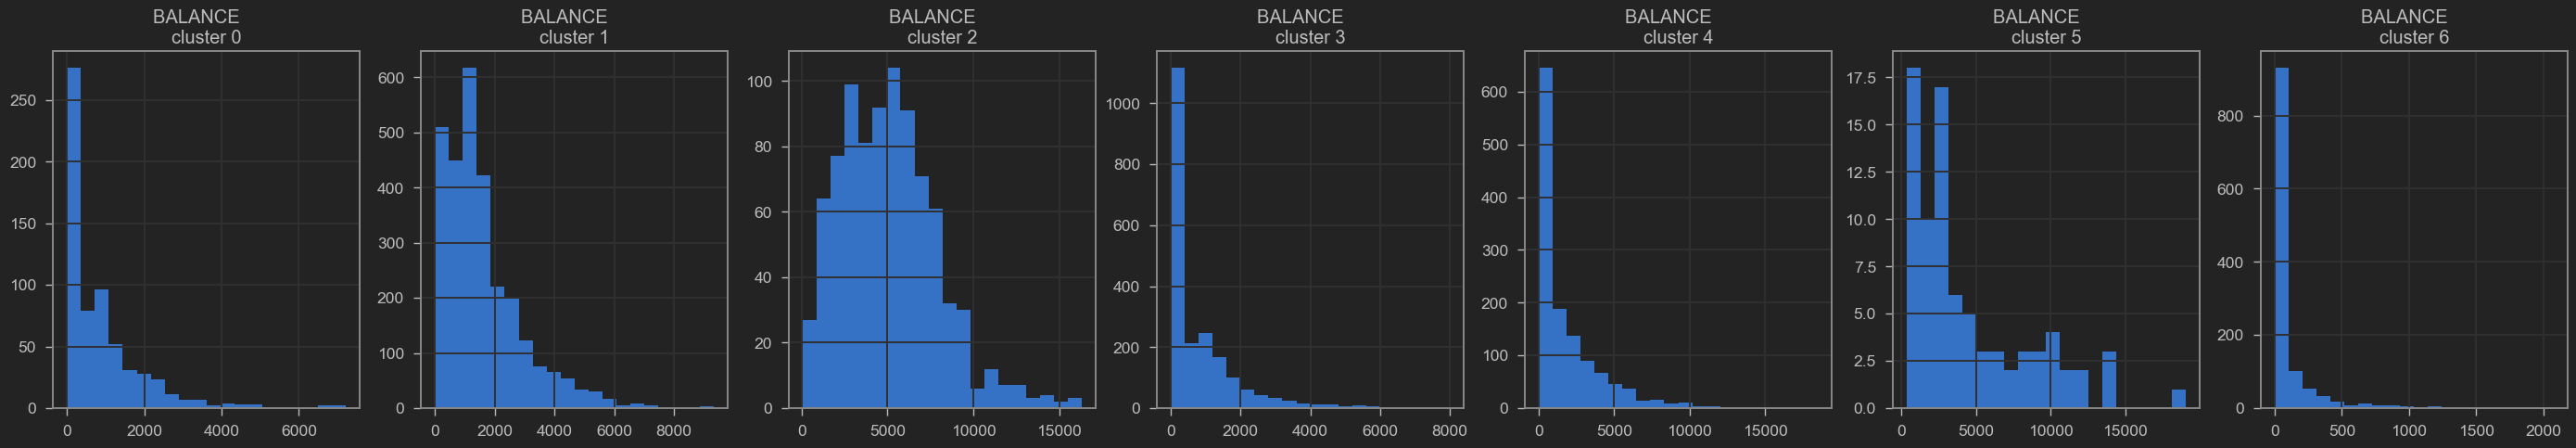

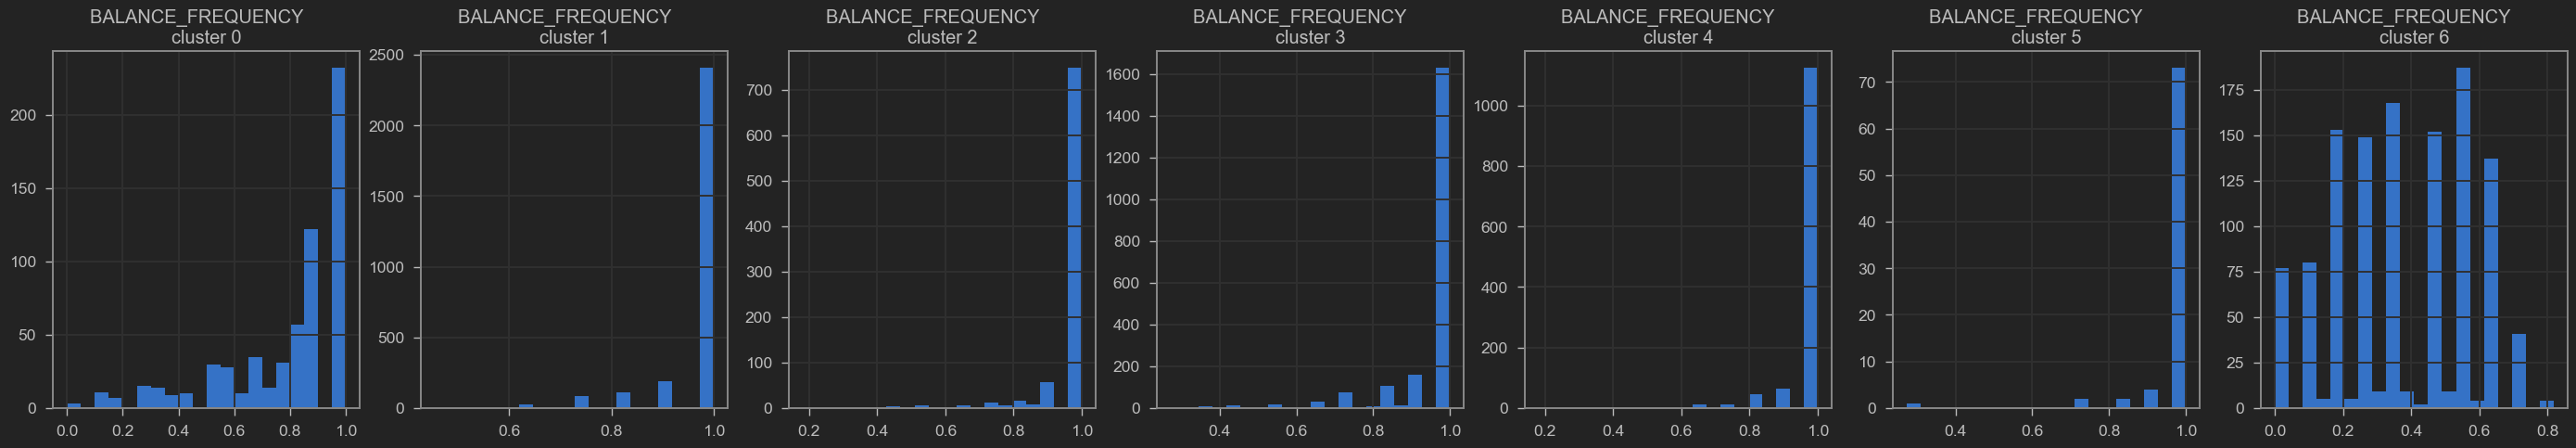

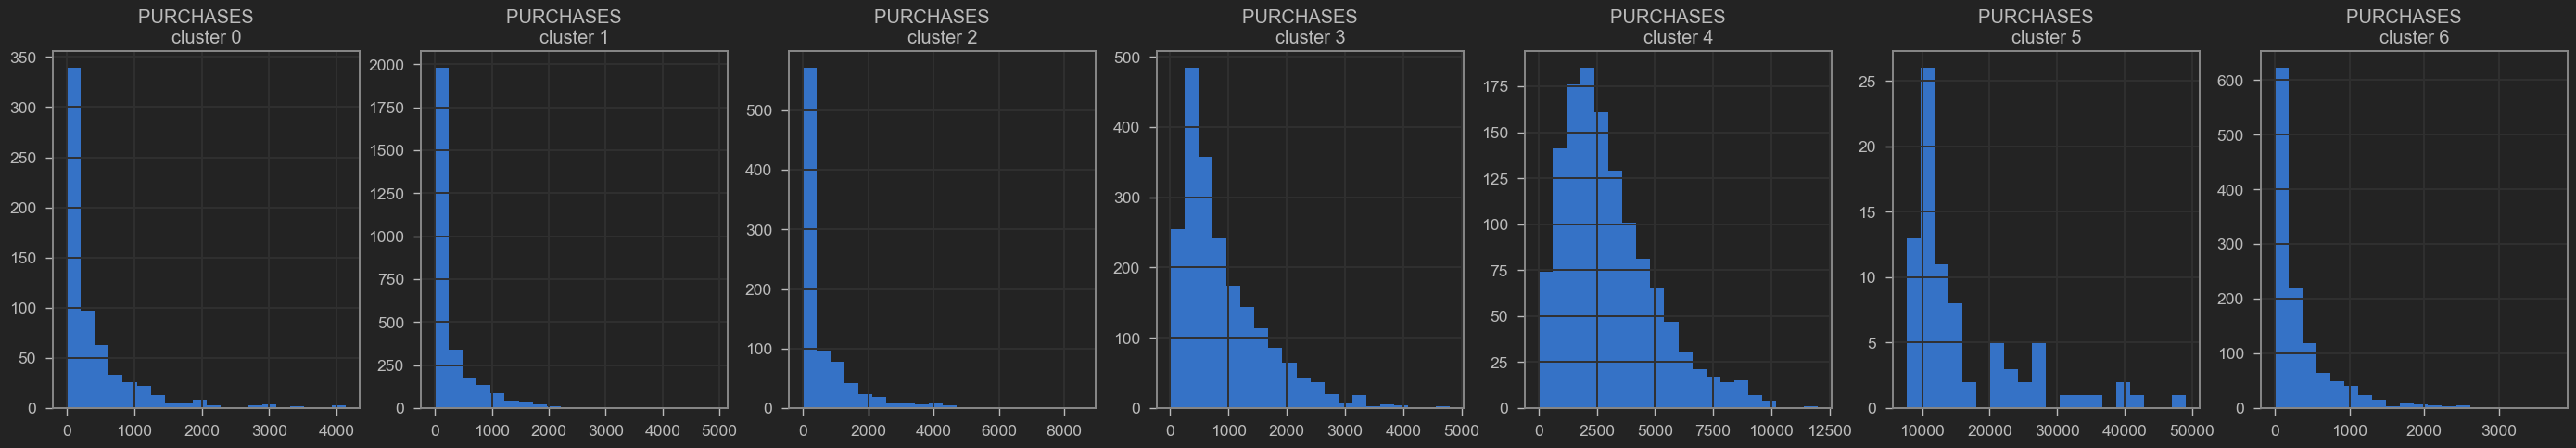

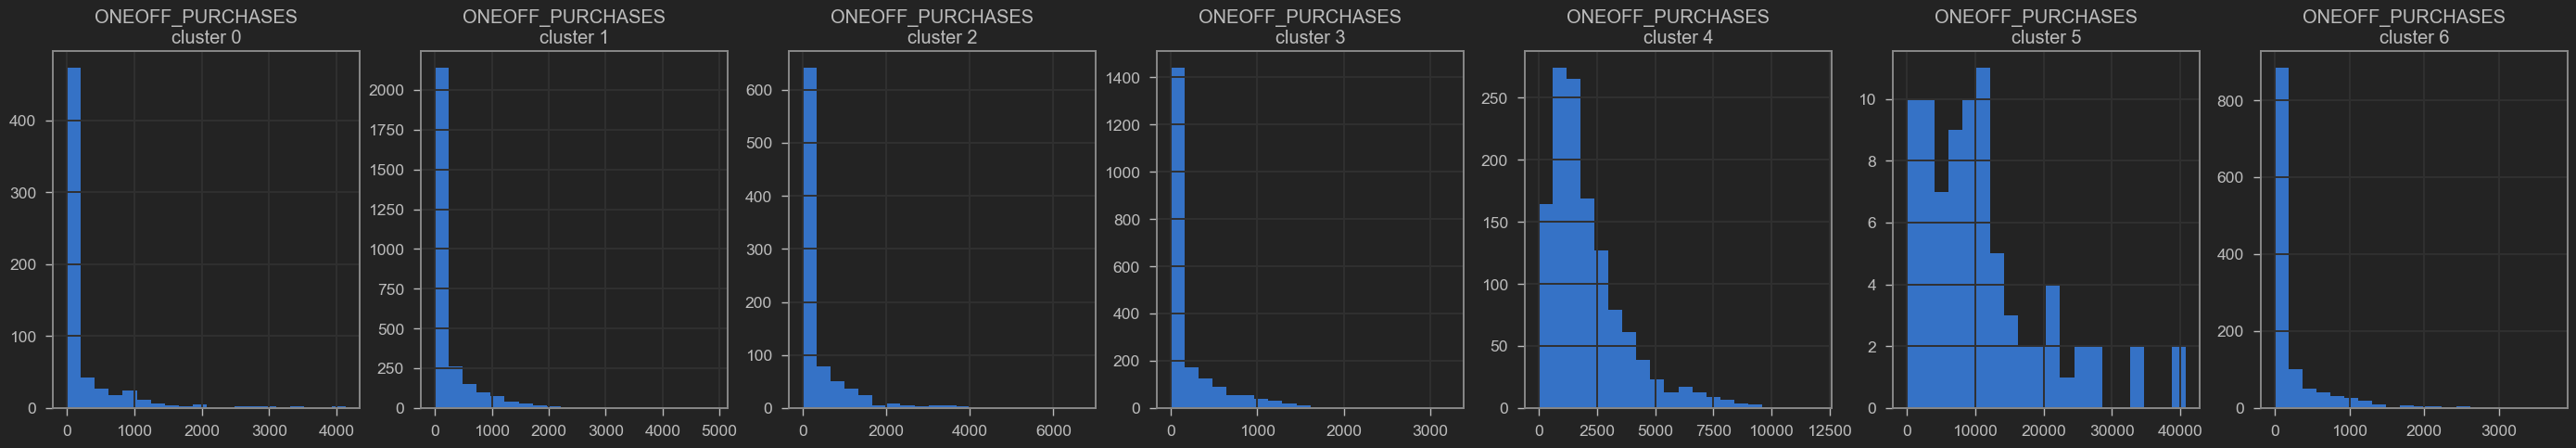

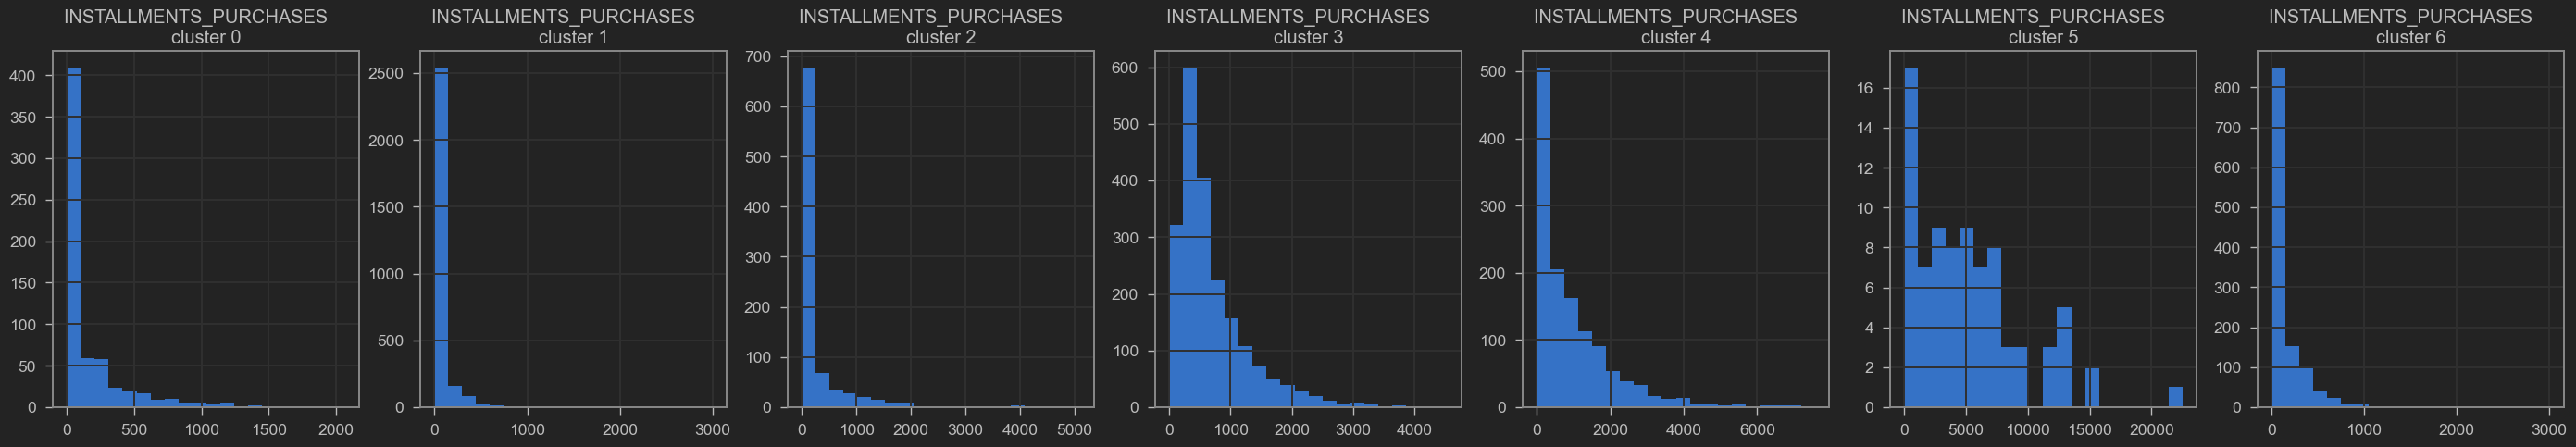

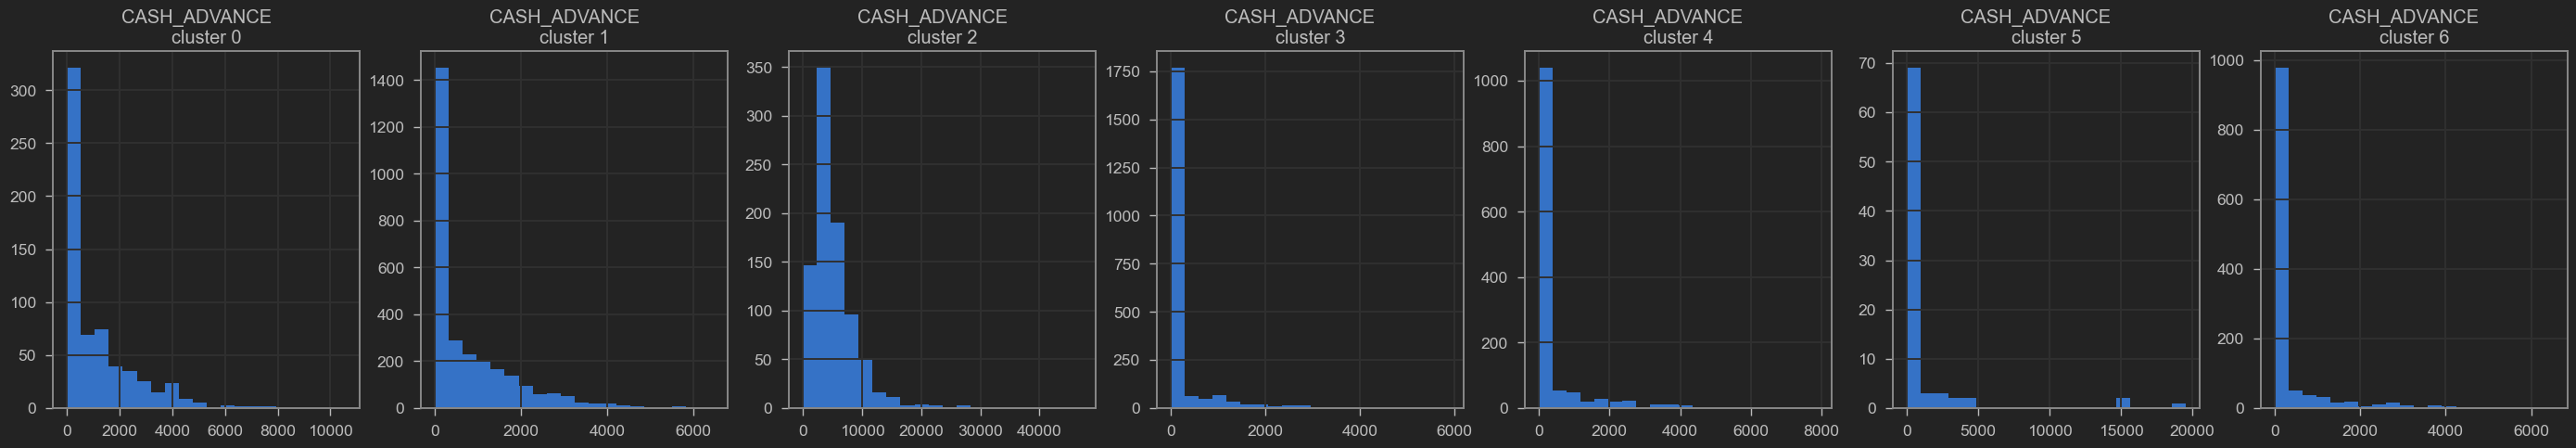

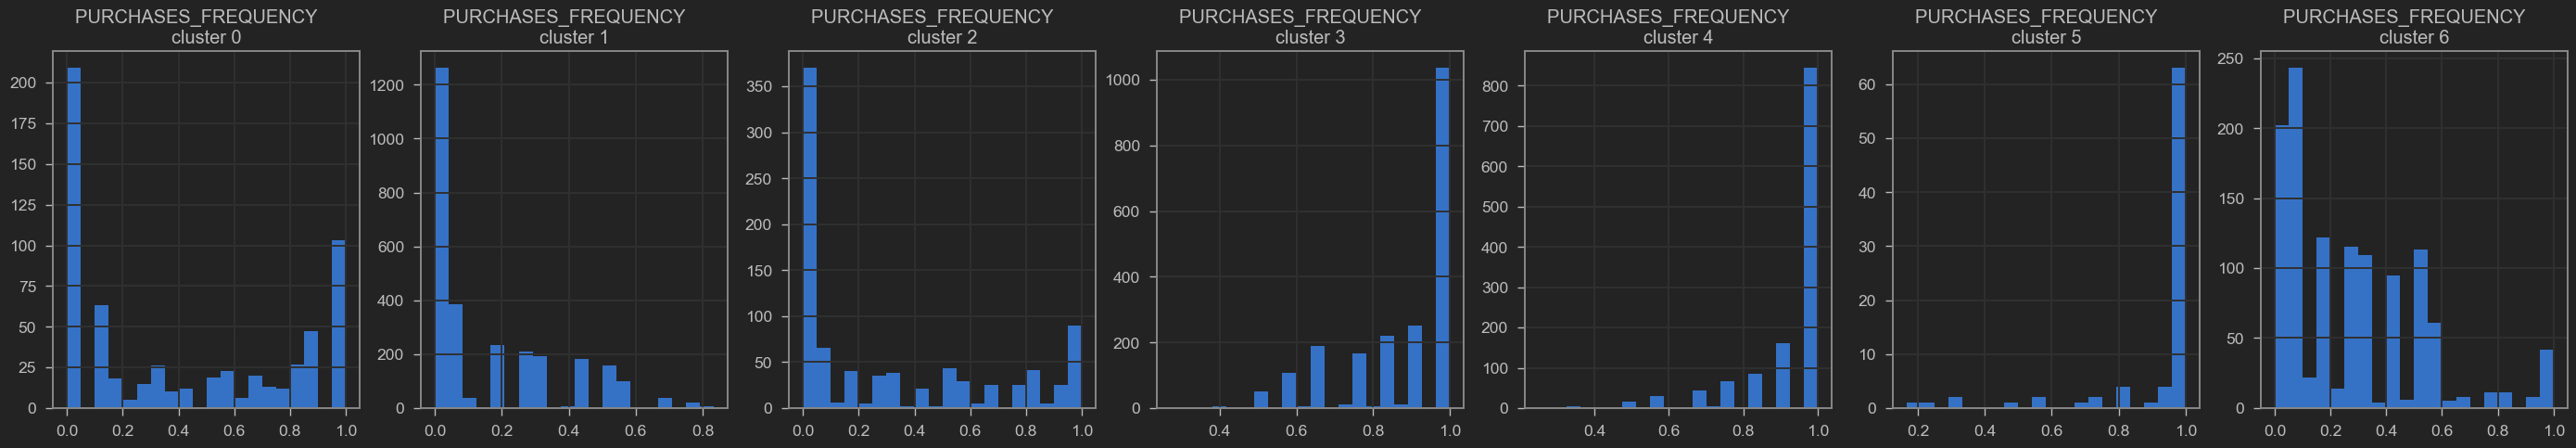

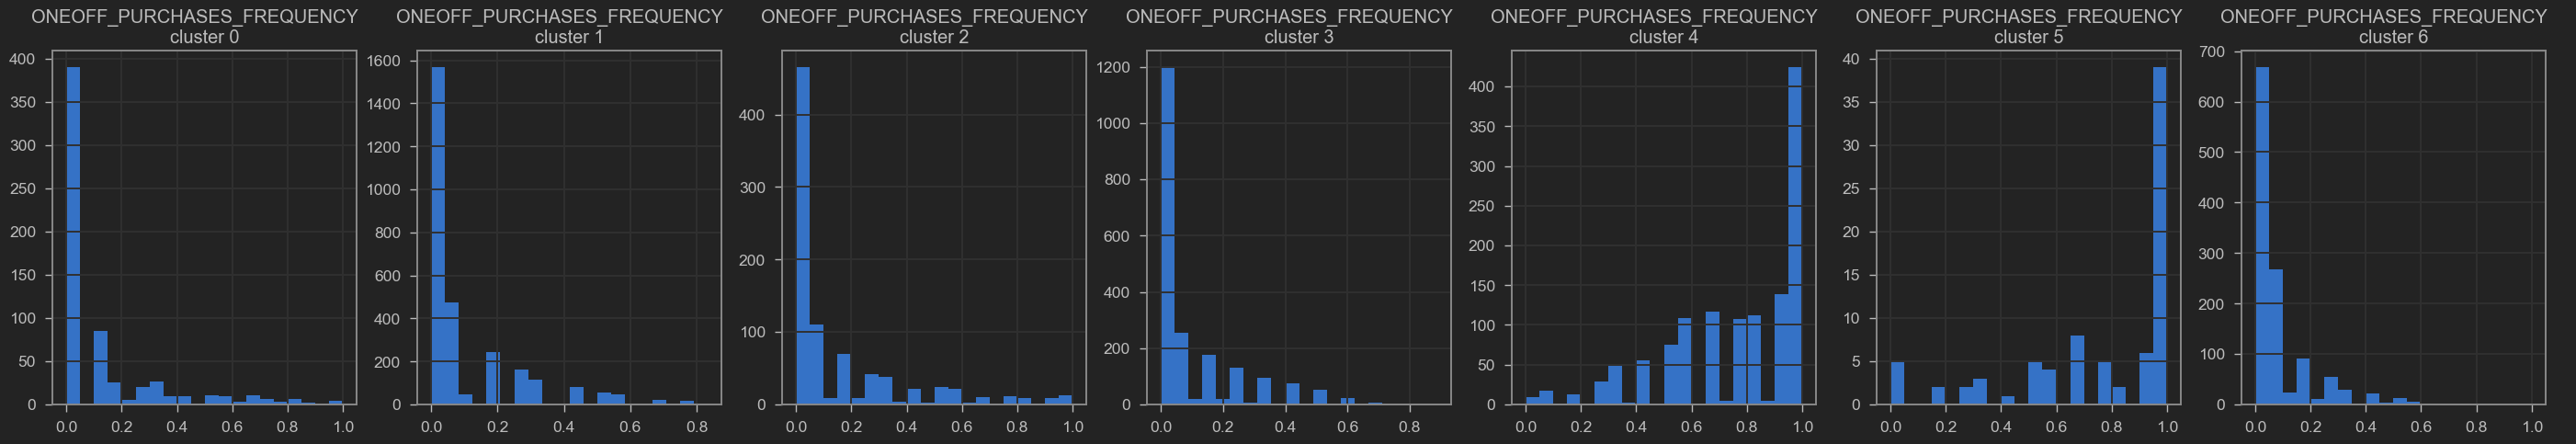

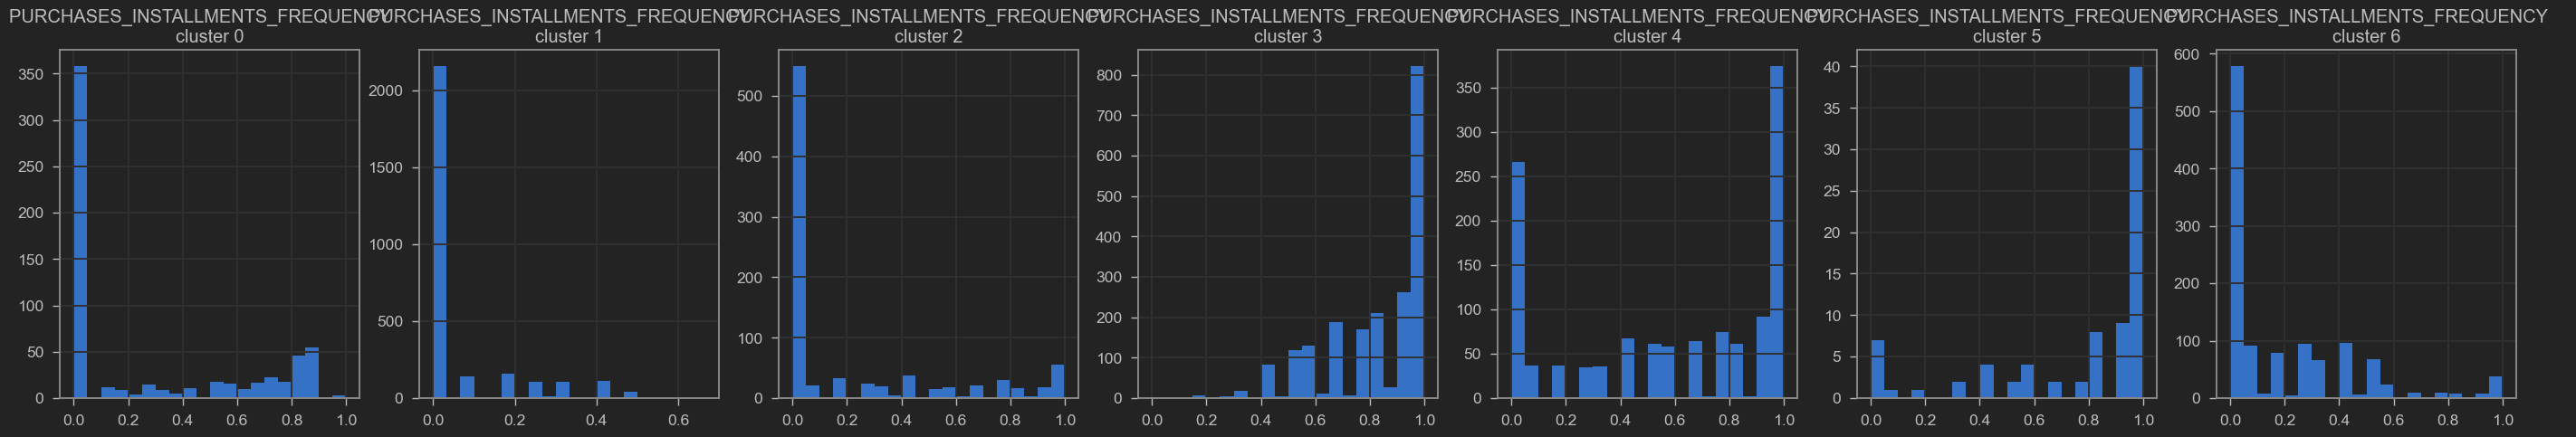

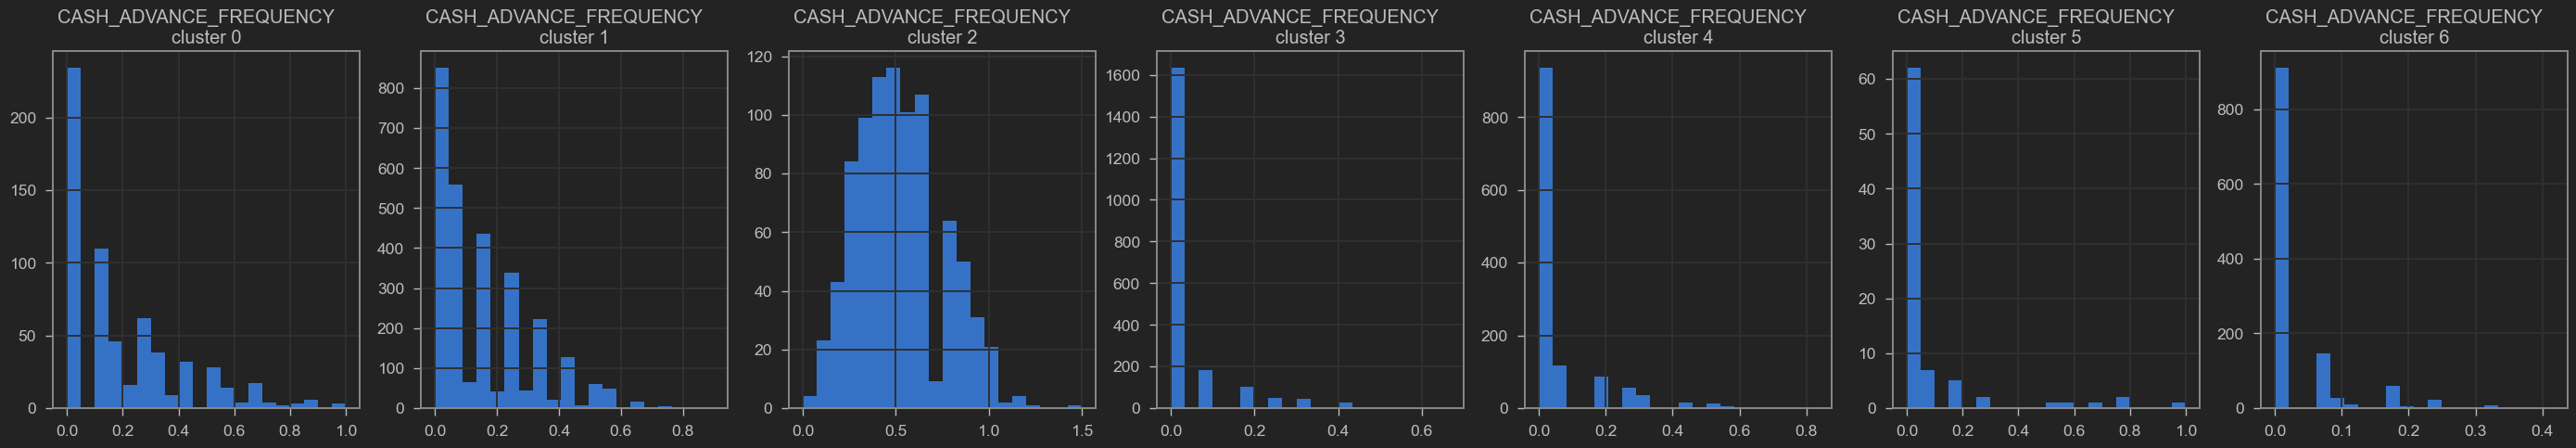

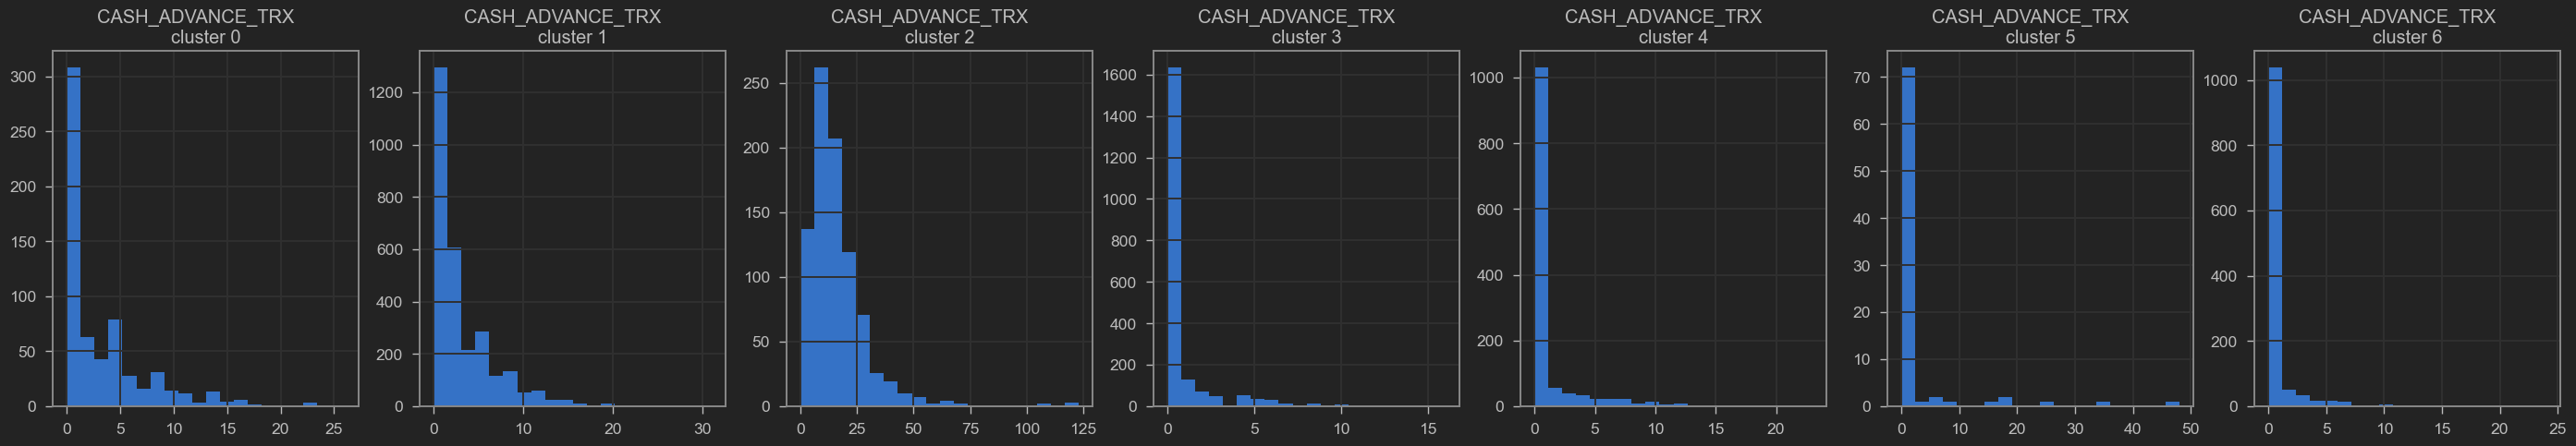

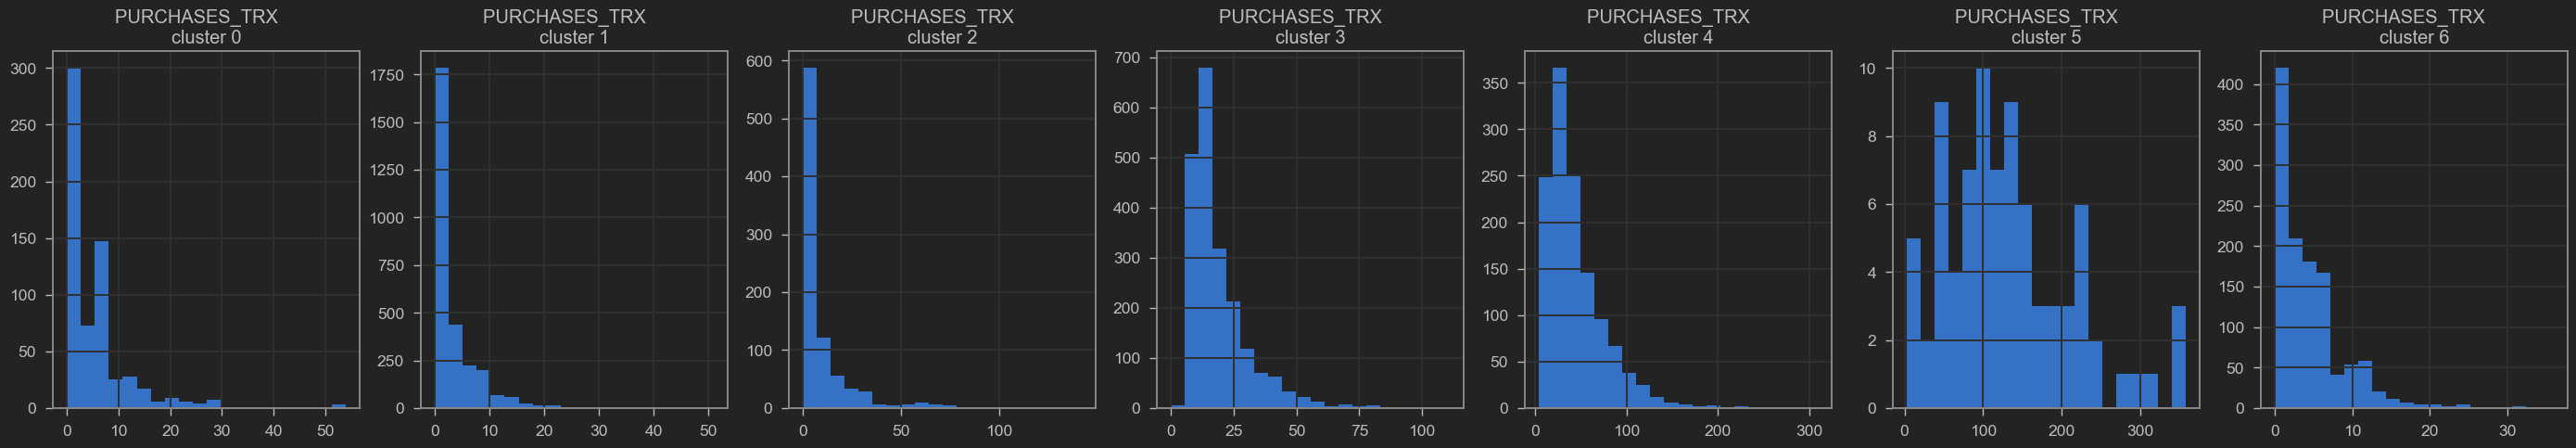

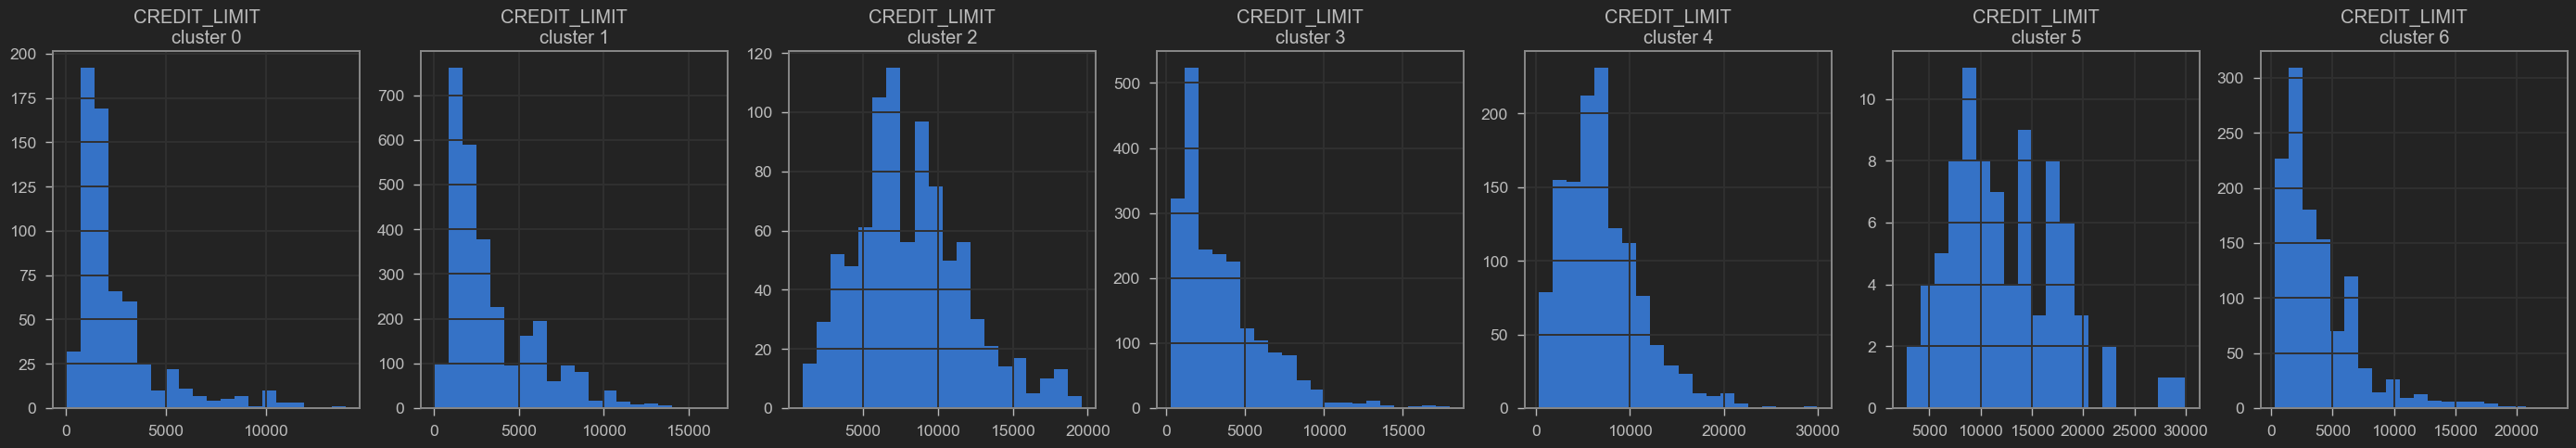

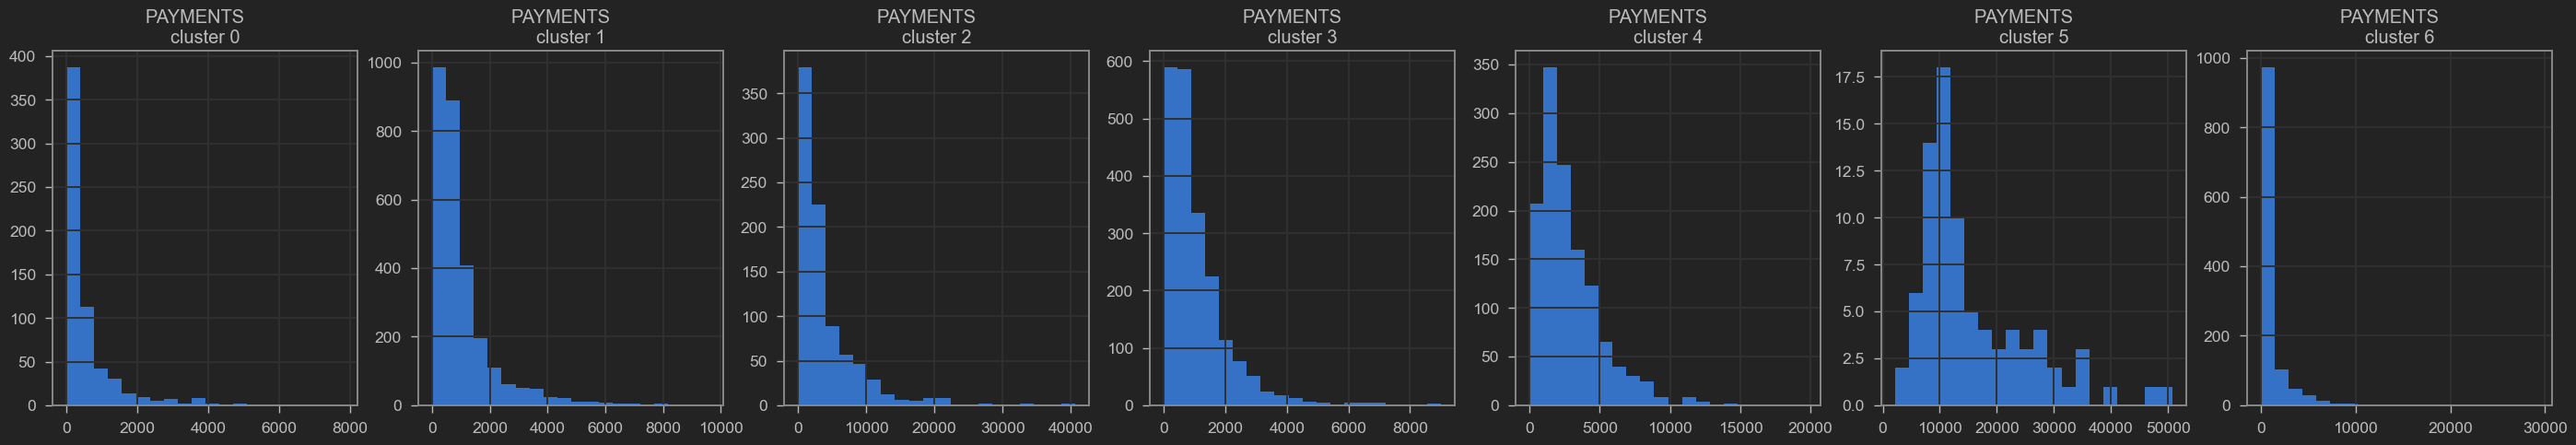

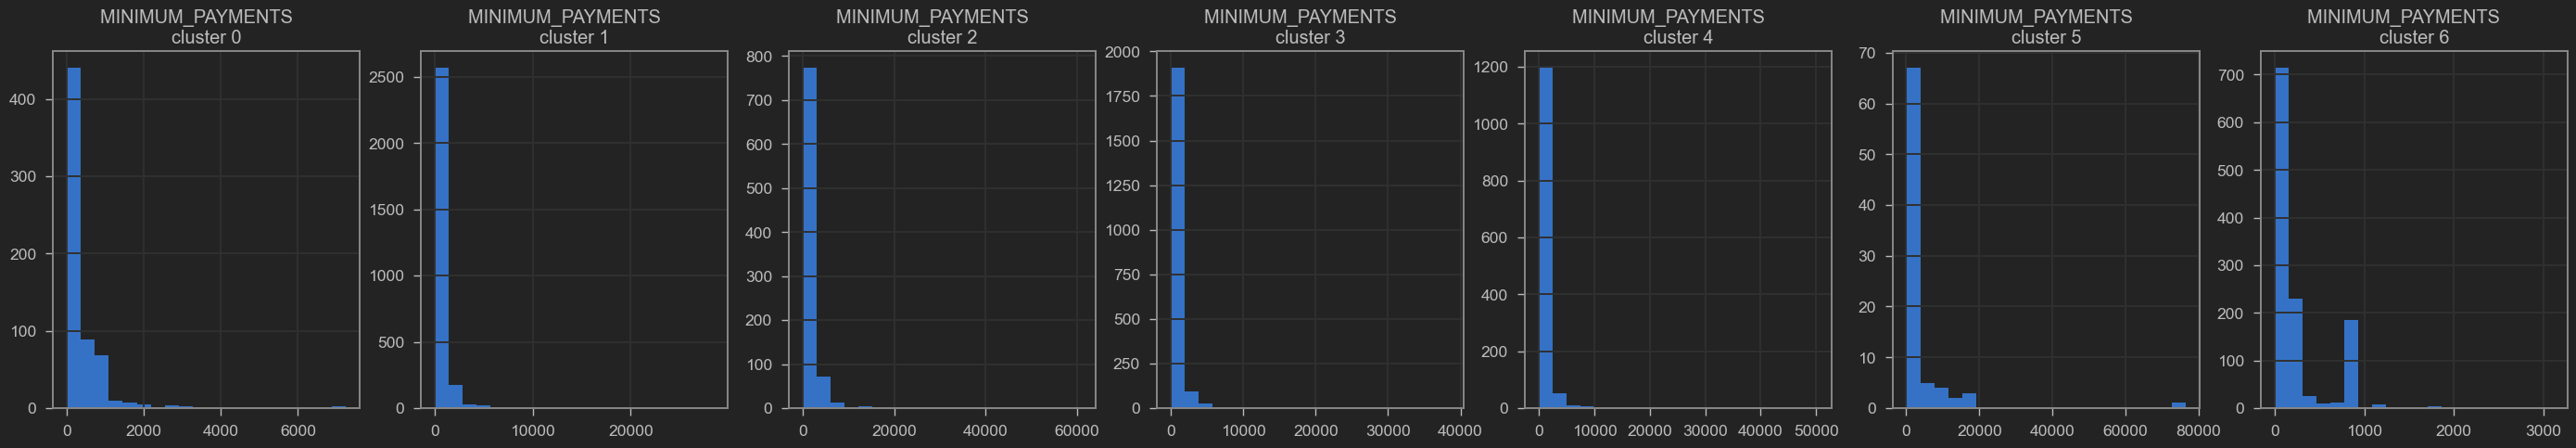

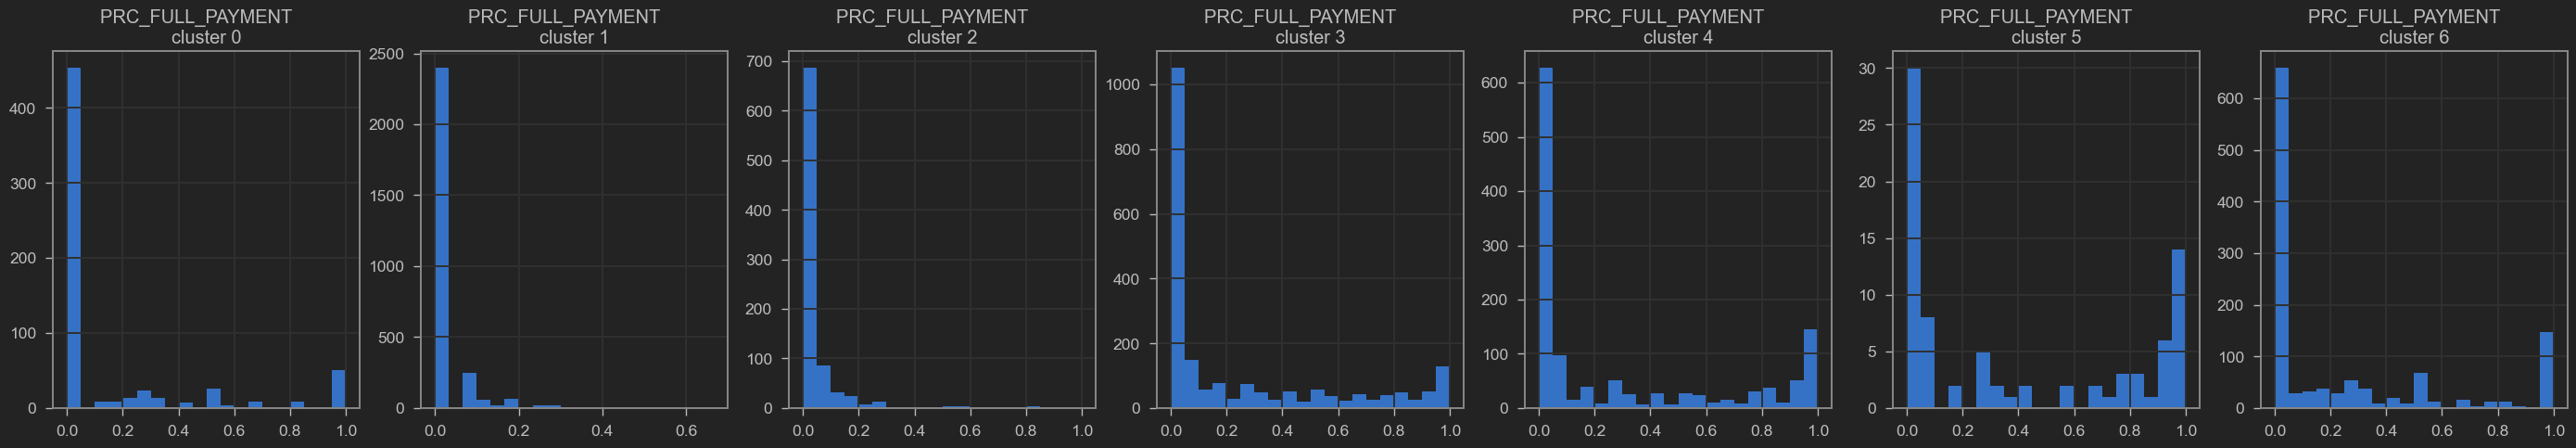

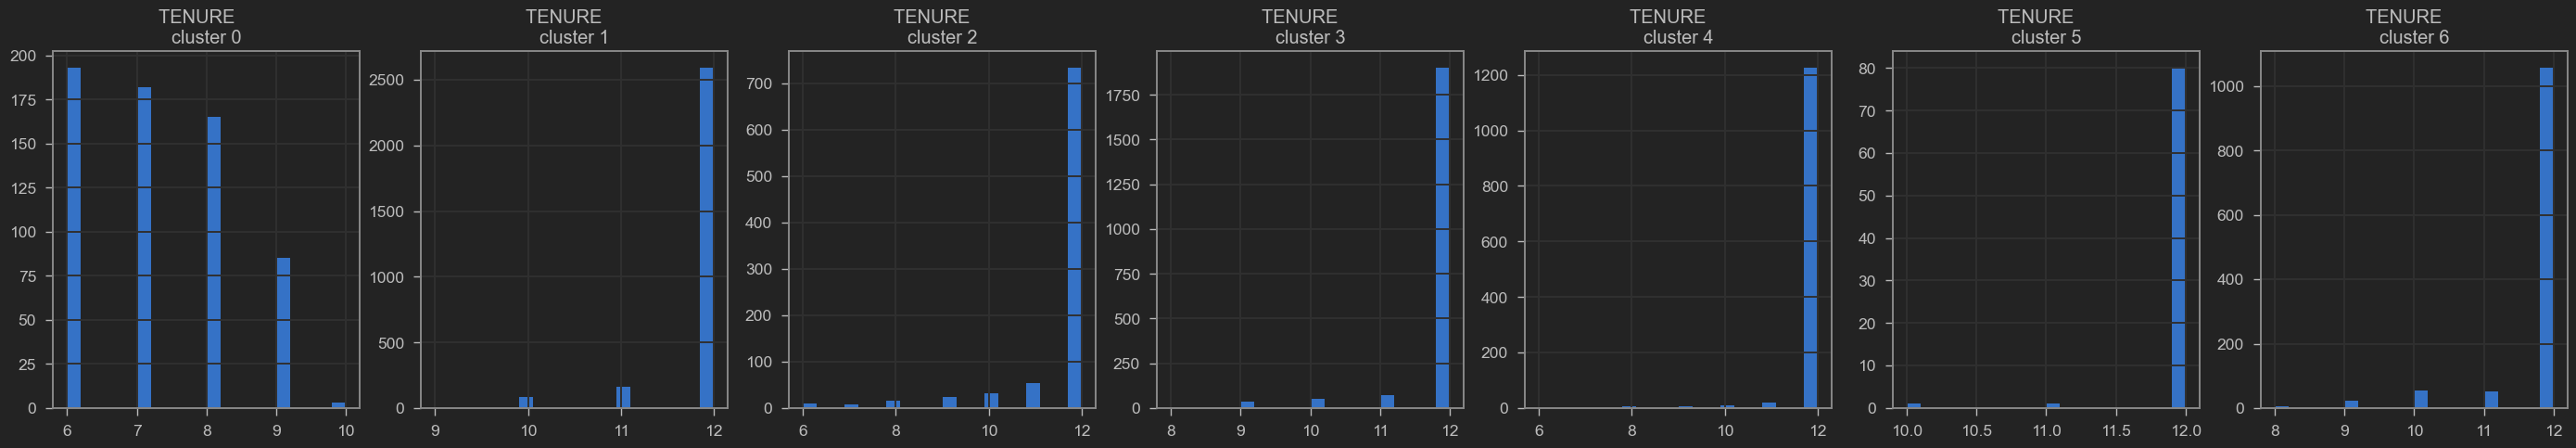

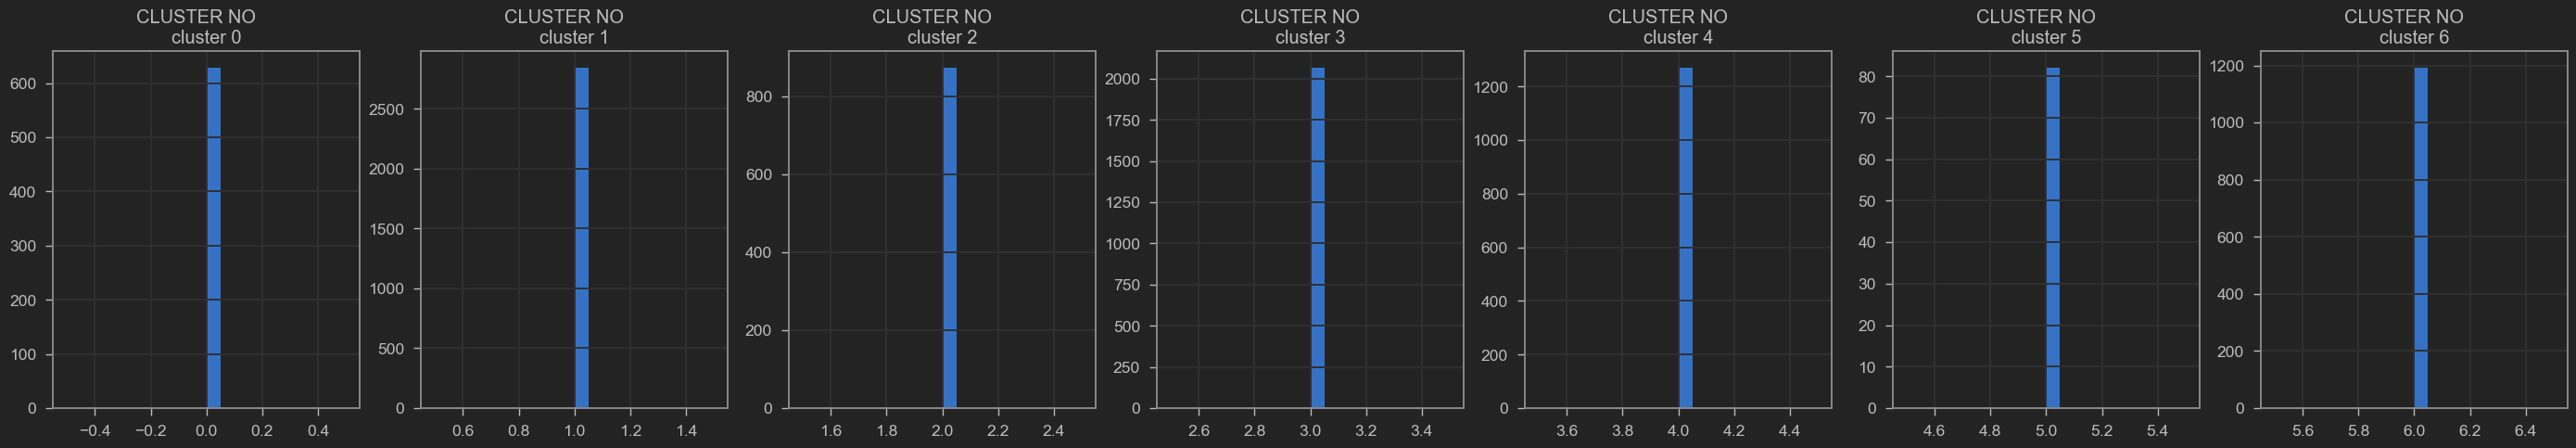

In [54]:
for i in credit_df_clusters.columns:
    plt.figure(figsize=(35,5))
    
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = credit_df_clusters[credit_df_clusters['CLUSTER NO'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \ncluster {}'.format(i,j))
    

## principal component analysis with 2 components only

In [55]:
pca = PCA(n_components=2)

In [56]:
principal_comp = pca.fit_transform(credit_df_scaled)
principal_comp

array([[-1.6822577 , -1.07628091],
       [-1.1380759 ,  2.50659268],
       [ 0.96975069, -0.38352266],
       ...,
       [-0.92641982, -1.81087346],
       [-2.33671419, -0.65799097],
       [-0.5566114 , -0.40065015]])

In [57]:
pca_2 = PCA()
pca_2.fit(credit_df)
pca_2.explained_variance_ratio_

array([4.75322776e-01, 1.77780758e-01, 1.39762596e-01, 1.13611742e-01,
       4.81844491e-02, 2.72642242e-02, 1.80654595e-02, 6.64122427e-06,
       7.19989995e-07, 5.87885287e-07, 3.83881591e-08, 4.19002444e-09,
       1.48189603e-09, 1.42849750e-09, 9.41891727e-10, 2.60457464e-10,
       1.51698666e-10])

In [58]:
cumsum_explained_variance = np.cumsum(pca_2.explained_variance_ratio_)

extra things for articles
***

#### PCA with 5 components only (95% explained variance)

In [59]:
pca_5_dim = PCA(n_components=5)
pca_5_dim.fit_transform(credit_df)
print(pca_5_dim.explained_variance_ratio_)


[0.47532278 0.17778076 0.1397626  0.11361174 0.04818445]


In [60]:
pca_5_dim.components_.shape

(5, 17)

In [61]:

row_name = ['PCA1','PCA2','PCA3','PCA4','PCA5']
pca_5_dim_correlation = pd.DataFrame(pca_5_dim.components_, columns=[credit_df.columns])
pca_5_dim_correlation.index = row_name
pca_5_dim_correlation

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
PCA1,0.291514,0.000008,0.292669,0.210824,0.081839,0.216269,0.000013,0.000023,0.000008,0.000010,0.000405,0.002341,0.690169,0.487383,0.132538,2.310726e-06,0.000039
PCA2,-0.300680,-0.000004,0.500858,0.380394,0.120505,-0.204386,0.000037,0.000028,0.000030,-0.000019,-0.000504,0.003517,-0.447287,0.470305,-0.190979,2.569856e-05,0.000003
PCA3,0.275038,0.000011,-0.096821,-0.077533,-0.019316,0.403156,-0.000031,-0.000028,-0.000018,0.000029,0.001002,-0.000983,-0.506799,0.296980,0.633259,-2.773109e-05,-0.000027
PCA4,0.055004,0.000009,0.295812,0.187130,0.108698,-0.560154,0.000045,0.000024,0.000037,-0.000032,-0.001157,0.003080,0.086999,-0.359013,0.642179,4.920300e-07,0.000051
PCA5,-0.722608,-0.000045,-0.287352,-0.277256,-0.010023,-0.134478,0.000005,-0.000021,0.000010,-0.000034,-0.000705,-0.002252,0.231215,0.367871,0.333791,5.625428e-05,0.000064


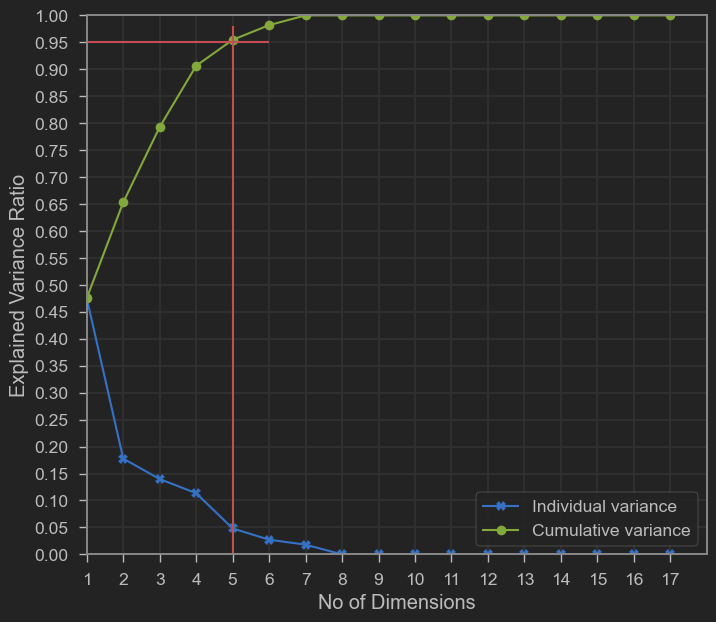

In [67]:
plt.plot(range(1,18), pca_2.explained_variance_ratio_,'-X', label = 'Individual variance')
plt.plot(range(1,18),cumsum_explained_variance,'-o', label = 'Cumulative variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('No of Dimensions')
plt.yticks(np.arange(0,1.1,0.05))
plt.xticks(np.arange(0,18,1))
plt.legend(loc= 4)
plt.grid(True)
plt.hlines(0.95,0,6,'r')
plt.vlines(5,0,0.98,'r')
plt.xlim(1,18)
plt.ylim(0,1)
plt.show()
#plt.yticks(np.arange(0,1,10))

In [96]:
## only with 2 component to visualize in 2D space
principal_comp.shape

(8950, 2)

In [69]:
pca_df = pd.DataFrame(principal_comp, columns = ['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,-1.682258,-1.076281
1,-1.138076,2.506593
2,0.969751,-0.383523
3,-0.873555,0.043218
4,-1.599437,-0.688394
...,...,...
8945,-0.359846,-2.016239
8946,-0.564567,-1.639200
8947,-0.926420,-1.810873
8948,-2.336714,-0.657991


In [70]:
pca_df = pd.concat([pca_df, pd.DataFrame({'CLUSTER NO':labels})], axis = 1)

In [71]:
pca_df.sample(5)

,PCA1,PCA2,CLUSTER NO
3320,3.861842,-0.892804,4
2763,0.726926,2.041762,2
7130,-1.475708,-0.915270,1
340,-1.379175,0.270019,1
2451,-1.927284,0.004666,1


In [72]:
pca_df.shape

(8950, 3)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

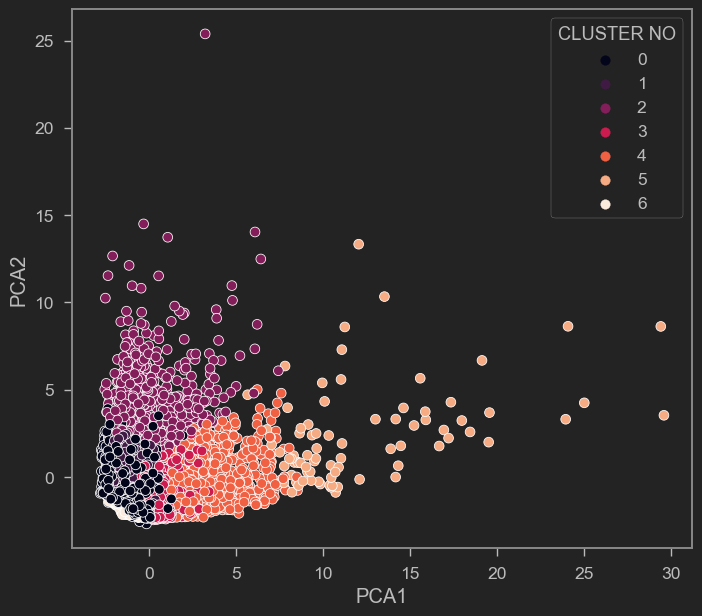

In [73]:
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'CLUSTER NO', data = pca_df, palette='rocket')